# Workbook for Master's Project
<a class = 'anchor' id = 'TOC'></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sc
import tensorflow.compat.v2 as tf
import time
import keras
%matplotlib inline

# Functions
from time import time
from datetime import datetime
from pmdarima import auto_arima, arima
from pmdarima.metrics import smape
from matplotlib.pylab import rcParams
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tools.eval_measures import mse, rmse, meanabs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.svm import SVR, LinearSVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel, RBF
from sklearn.gaussian_process.kernels import ExpSineSquared, DotProduct, Matern
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN
from keras.layers import Input, Dropout, TimeDistributed
from keras.preprocessing.sequence import TimeseriesGenerator

# Warnings
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Table of Contents
***
Initialization
    
* [Section 1: Initializing the BTC Dataset](#section1)

* [Section 2: Initializing the NOAA Dataset](#section2)

* [Section 3: Splitting Datasets into Train/Test](#section3)

    * [Reset Results Dataframe](#reset)
    

* [Section 4: Stationarity Testing for Datasets](#section4)

* [Section 5: General Model Functions](#section5)

    * [Initialize Document](#initial)

***

Classical Models

* [Section 6: Benchmark Model](#section6)

* [Section 7: SARIMA Models](#section7)

    * [Section 7.1: ARIMA](#section7.1)
    
    * [Section 7.2: SARIMA](#section7.2)

* [Section 8: ETS Models](#section8)
    
    * [Section 8.1: ETS - AAN](#section8.1)
    
    * [Section 8.2: ETS - AMN](#section8.2)
    
    * [Section 8.3: ETS - AAA](#section8.3)
    
    * [Section 8.4: ETS - AMA](#section8.4)
    
    * [Section 8.5: ETS - AAM](#section8.5)
    
    * [Section 8.6: ETS - AMM](#section8.6)
   
***
    
Machine Learning Models


* [Section 9: SVR Models](#section9)

* [Section 10: CART Models](#section10)

* [Section 11: KNN Models](#section11)

* [Section 12: GP Models](#section12)

* [Section 13: MLP Models](#section13)

***

Deep Learning Models

* [Section 14: RNN Models](#section14)

* [Section 15: LSTM Models](#section15)

* [Section 16: GRU Models](#section16)

***

Results

* [Formatting Results](#results)

### Model Classes
<img src="ModelTree.PNG" alt="drawing" width="500"/>

In [278]:
# Python versions

import sklearn
import statsmodels
import pmdarima
import matplotlib
import scipy

print('Python version: ', )
! python --version

print('\nnumpy version: ', np.__version__)
print('matplotlib version: ', matplotlib.__version__)
print('pandas version: ', pd.__version__)
print('scipy version: ', scipy.__version__)
print('sklearn version: ', sklearn.__version__)
print('statsmodels version: ', statsmodels.__version__)
print('keras version: ', keras.__version__)
print('pmdarima version: ', pmdarima.__version__)
print('tensorflow version: ', tf.__version__)

Python version: 
Python 3.8.3

numpy version:  1.19.5
matplotlib version:  3.2.2
pandas version:  1.4.2
scipy version:  1.5.0
sklearn version:  0.23.1
statsmodels version:  0.12.2
keras version:  2.6.0
pmdarima version:  1.8.0
tensorflow version:  2.6.0


<a class = 'anchor' id = 'section1'></a>

# Section 1: Initializing the BTC Dataset 

* [Back to Top](#TOC)

This section involves inporting the raw data and cleaning it. This was already done and saved to a csv file. The code is shown here for reference. 

In [2]:
# Import BTC dataset
# BTCdf = pd.read_csv('Binance_BTCUSDT_1h.csv', usecols=['date', 'close'])
# BTCdf.head()

In [3]:
# Step 1: separate date col into date and time cols
# Step 2: format time col
# Step 3: index as combo of date col and formatted time col

# Step 1:
# BTCdf[['Date', 'Time']] = BTCdf.date.str.split(expand = True)

# Step 2:

# Part 1: Test if to_datetime() can handle formats as is
#BTCdf.index = pd.to_datetime(BTCdf['Date'] + ' ' + BTCdf['Time'])
#BTCdf.head()
# False, it cannot handle that format

In [4]:
# # Part 2: Build conditions to convert format

# def time_formatter(time_formats):
#     '''
#     Formats a specific time format from the original data
#     to fit a format that pandas.to_datetime() can read.
    
#     ## Inputs:
#     time_formats: 1-D array or series (numpy/pandas)
    
#     ## Outputs:
#     time_formats: 1-D array 
#     '''
#     #print(len(time_formats))
# #     for t in range(time_formats.size):
#     for t in range(len(time_formats)):
#         # Conditions for AM times
#         if time_formats[t][-2:] == 'AM':
#             if time_formats[t][:2] == '12':
#                 time_formats[t] = '0:00'
#             else:
#                 time_formats[t] = time_formats[t][:2] + ':00'

#         # Conditions for PM times
#         if time_formats[t][-2:] == 'PM':
#             if time_formats[t][:2] != '12':
#                 time_formats[t] = str(np.int(time_formats[t][:2])+12) + ':00'
#             else:
#                 time_formats[t] = time_formats[t][:2] + ':00'
    
#     return time_formats

# #time_formats = BTCdf['Time'].unique()
# #print(time_formats)
# # Check
# #time_formats = time_formatter(time_formats)
# #print('\n', time_formats)

In [5]:
# # Redo this function

# def time_formatter2(time_format):
#     '''
#     A mapable version of the time_formatter function above.
#     '''
# #     print(time_format, type(time_format))
#     # Conditions for AM times
#     if time_format[-2:] == 'AM':
#         if time_format[:2] == '12':
#             time_format = '0:00'
#         else:
#             time_format = time_format[:2] + ':00'

#     # Conditions for PM times
#     elif time_format[-2:] == 'PM':
#         if time_format[:2] != '12':
#             time_format = str(np.int(time_format[:2])+12) + ':00'
#         else:
#             time_format = time_format[:2] + ':00'

#     return time_format

# # Testing function
# time_formats = BTCdf['Time'].unique()
# #print(time_formats)
# for t in range(len(time_formats)):
#     time_formats[t] = time_formatter2(time_formats[t])
# print(time_formats)

In [6]:
# # Mapping formatting function to df['Time'] col
# BTCdf['Time'] = BTCdf['Time'].map(time_formatter2)
# BTCdf['Time'].unique()

In [7]:
# # Step 3:
# BTCdf.index = pd.to_datetime(BTCdf['Date'] + ' ' + BTCdf['Time'])
# #BTCdf.head()

In [8]:
# # Reversed order of  matrix for better display
# BTCdf = BTCdf[::-1]
# #BTCdf.head()
# #BTCdf.tail()

In [9]:
# # Test plotting using pandas' built-in plot feature
# closes = BTCdf['close']
# closes.plot(c = 'midnightblue');
# plt.title('BTC Hourly Closing Data')
# plt.xlabel('Time')
# plt.ylabel('Close Amount ($)');

In [10]:
# Testing for duplicates

In [11]:
# # Testiing for and removing duplicates

# # Total length of time covered by dataset
# print('Length of time in series', BTCdf.index[-1] - BTCdf.index[0])

# # Total number of hours
# print('Length in hours', 1545*24+20)

# # Length of dataset
# print('Length of series', len(BTCdf))

# # Length of dataset minus the total number of covered hours
# # This equals the number of duplicates
# print('Length of series minus length of time of series', len(BTCdf) - (1545*24+20))

# # Return number of duplicated rows in index (which are supposed to be unique)
# dups = pd.Series(BTCdf.index.duplicated())[pd.Series(BTCdf.index.duplicated())].count()
# print('Number of duplicates in series', dups)

# # Removing duplicates
# print('\nLength before dup removal', len(BTCdf.index))
# BTCdf = BTCdf[np.invert(BTCdf.index.duplicated())]
# print('Length after dup removal', len(BTCdf.index))

In [12]:
# # Replotting after removing duplicates
# closes = BTCdf['close']

# closes.plot(c = 'midnightblue');
# plt.title('BTC Hourly Closing Data')
# plt.xlabel('Time')
# plt.ylabel('Close Amount ($)');

In [13]:
# # Checking for null values
# print(len(closes))
# print(len(closes[closes.isna()]))

In [14]:
# Missing data ws found using the cell below
# Data imputation was done manually in Excel using an average of the 
# boundary values for the imputed data entries.

# Example:
# If given data was:
# 2017-12-01  2.0
# 2017-12-04  3.0

# Then the imputed data would be:
# 2017-12-01  2.0
# 2017-12-02  2.5
# 2017-12-03  2.5
# 2017-12-04  3.0

In [15]:
# # Testing for missing data

# # Except for first and last day, run for loop over each day and check if
# # there is 24 hours. If not, that day has the missing data.

# #closes.index[20]# Missing 4 hours from first day
# #closes.index[37100] # Missing 23 hours from last day

# #closes.index[20:37100] # 37080 entries to test
# print('Length of "full" days to test', len(closes.index[20:37100]))
# print('Length divided by 24', len(closes.index[20:37100])/24)
# # NOT integer implies missing data

# #str(pd.Series(closes.index.date).unique()[0])

# #closes['2017-08-17']
# #closes[str(pd.Series(closes.index.date).unique()[0])]

# missing_count = 0
# for t in pd.Series(closes.index[20:37100].date).unique():
#     if len(closes[str(t)]) < 24:
#         print(t, 24-len(closes[str(t)]))
#         missing_count += (24-len(closes[str(t)]))
# print(missing_count)

In [16]:
# Save BTC dataframe to file
# BTCdf.to_csv('BTCdf.csv')

This cell below reads in the saved, preprocessed BTC data from a csv file.

In [17]:
# Read in BTC dataframe and set index as DateTime index
BTCdf = pd.read_csv('BTCdf.csv', index_col='Unnamed: 0')
BTCdf.index = pd.to_datetime(BTCdf.index)

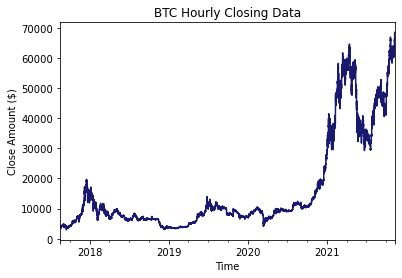

In [18]:
# Plotting BTC and truncated BTC
closes = BTCdf['close']
closes.plot(c = 'midnightblue');
plt.title('BTC Hourly Closing Data')
plt.xlabel('Time')
plt.ylabel('Close Amount ($)');

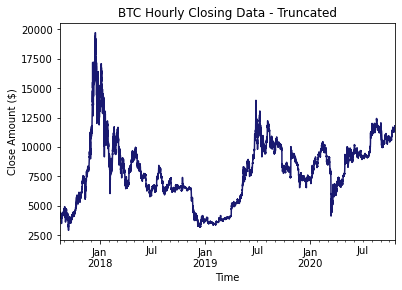

In [19]:
# 75% truncation
closes = closes[:27840]
closes.plot(c = 'midnightblue');
plt.title('BTC Hourly Closing Data - Truncated')
plt.xlabel('Time')
plt.ylabel('Close Amount ($)');

In [20]:
# The BTC dataset should be truncated such that the highly volatile jump in 
# January 2021 is not present. 

# 75% is sufficient. 

# End Section 1
<a class = 'anchor' id = 'section2' ></a>

# Section 2: Initializing the NOAA Dataset
* [Back to Top](#TOC)

This section involves importing and cleaning the NOAA dataset. This was already done and saved to a csv file. It is kept here for reference.

In [21]:
# # Create headings list
# noaa_headings = np.array(['WBANNO', 'UTC_DATE', 'UTC_TIME', 'LST_DATE', 'LST_TIME', 'CRX_VN', 'LONGITUDE', 'LATITUDE', 'T_CALC', 'T_HR_AVG', 'T_MAX', 'T_MIN', 'P_CALC', 'SOLARAD', 'SOLARAD_FLAG', 'SOLARAD_MAX', 'SOLARAD_MAX_FLAG', 'SOLARAD_MIN', 'SOLARAD_MIN_FLAG', 'SUR_TEMP_TYPE', 'SUR_TEMP', 'SUR_TEMP_FLAG', 'SUR_TEMP_MAX', 'SUR_TEMP_MAX_FLAG', 'SUR_TEMP_MIN', 'SUR_TEMP_MIN_FLAG', 'RH_HR_AVG', 'RH_HR_AVG_FLAG', 'SOIL_MOISTURE_5', 'SOIL_MOISTURE_10', 'SOIL_MOISTURE_20', 'SOIL_MOISTURE_50', 'SOIL_MOISTURE_100', 'SOIL_TEMP_5', 'SOIL_TEMP_10', 'SOIL_TEMP_20', 'SOIL_TEMP_50', 'SOIL_TEMP_100'])

# # Load datasets
# noaa_2017 = pd.read_csv('NOAA_Boulder_2017.csv', names = noaa_headings)
# noaa_2018 = pd.read_csv('NOAA_Boulder_2018.csv', names = noaa_headings)
# noaa_2019 = pd.read_csv('NOAA_Boulder_2019.csv', names = noaa_headings)
# noaa_2020 = pd.read_csv('NOAA_Boulder_2020.csv', names = noaa_headings)
# noaa_2021 = pd.read_csv('NOAA_Boulder_2021.csv', names = noaa_headings)

# # Combine dataframes and redfine as subset of original
# NOAAdf = pd.concat([noaa_2017, noaa_2018, noaa_2019, noaa_2020, noaa_2021])
# NOAAdf = NOAAdf[['UTC_DATE', 'UTC_TIME', 'T_HR_AVG']]
# NOAAdf

In [22]:
# # Change index to datetime index
# NOAAdf.index = pd.to_datetime(NOAAdf['UTC_DATE'] + ' ' + NOAAdf['UTC_TIME'])
# NOAAdf

In [23]:
# Obtain predictor variable: average air temperature over entire hour
# T_avg = NOAAdf['T_HR_AVG']

In [24]:
# # Change data errors/outliers

# # Setting them to the last value
# print(T_avg.describe()) # check
# for i in range(1, T_avg.size):
#     if T_avg[i] == -9999:
#         T_avg[i] = T_avg[i-1]
# print(T_avg.describe())

In [25]:
# # Plot of average surface temp
# T_avg.plot(c = 'midnightblue');
# plt.title('Average Air Temperature');
# plt.xlabel('Time')
# plt.ylabel('Temperature (Celcius)');

In [26]:
# # Testing for duplictes

# # Total length of time covered by dataset
# print('Total time of series: ', NOAAdf.index[-1] - NOAAdf.index[0])

# # Total number of hours 
# print('Total number of hours in that period: ', 1774*24+19)

# # Length of dataset
# print('Length of series: ', len(NOAAdf))

# # Return number of duplicated rows in index (which are supposed to be unique)
# print('Number of duplicated rows: ', pd.Series(NOAAdf.index.duplicated())[pd.Series(NOAAdf.index.duplicated())].count())

# # Length of dataset minus the total number of covered hours
# print('Length of dataset minus time: ', len(NOAAdf) - (1774*24+19))

# # Removing duplicates
# print('Length before removing dups: ', len(NOAAdf.index))
# NOAAdf = NOAAdf[np.invert(NOAAdf.index.duplicated())]
# print('Length after removing dups: ', len(NOAAdf.index))

In [27]:
# # Checking for null values
# print(len(T_avg))
# print(len(T_avg[T_avg.isna()]))

In [28]:
# # Testing for missing data

# # Except for first and last day, run for loop over each day and check if
# # there is 24 hours. If not, that day has the missing data.

# # T_avg.index[:23] # Missing 1 hour from first day
# # T_avg.index[42596-21:] # Missing 4 hours from last day

# # T_avg[23:42596-21] # 42552 entries to test
# print('Length of "full" days to test', len(T_avg[23:42596-21]))
# print('Length divided by 24', len(T_avg[23:42596-21])/24)
# # This was an integer (1773), but need to check for missing days?

In [29]:
# Save NOAA dataframe to file
# NOAAdf.to_csv('NOAAdf.csv')

This cell below reads in the cleaned NOAA data from a csv file.

In [30]:
# Read in NOAA dataframe and set index as DateTime index
NOAAdf = pd.read_csv('NOAAdf.csv', index_col='Unnamed: 0')
NOAAdf.index = pd.to_datetime(NOAAdf.index)

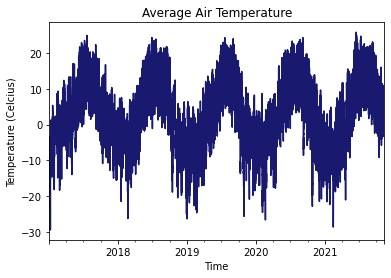

In [31]:
# Set variable and plot

# Average hourly air temperature (degrees Celcius)
T_avg = NOAAdf['T_HR_AVG']
T_avg.plot(c = 'midnightblue');
plt.title('Average Air Temperature');
plt.xlabel('Time')
plt.ylabel('Temperature (Celcius)');

# End Section 2
<a class = 'anchor' id = 'section3'></a>

# Section 3: Splitting Datasets into Train/Test
* [Back to Top](#TOC)

This section involves splitting the datasets into train-test splits, creating shifted data from the NOAA dataset, created scaled datasets, etc. It alsi creates the results dataframe which all of the model metrics will be stored.

In [34]:
# Splitting data into train and test partitions

## BTC Dataset

# 80/20 split
closes_train_1, closes_test_1 = train_test_split(closes, test_size=0.20, shuffle=False)

# 85/15 split
closes_train_2, closes_test_2 = train_test_split(closes, test_size=0.15, shuffle=False)

# 90/10 split
closes_train_3, closes_test_3 = train_test_split(closes, test_size=0.10, shuffle=False)


## NOAA Dataset

# 80/20 split
T_avg_train_1, T_avg_test_1 = train_test_split(T_avg, test_size=0.20, shuffle=False)

# 85/15 split
T_avg_train_2, T_avg_test_2 = train_test_split(T_avg, test_size=0.15, shuffle=False)

# 90/10 split
T_avg_train_3, T_avg_test_3 = train_test_split(T_avg, test_size=0.10, shuffle=False)

# Checks
print('BTC')
print(len(closes_test_1)/len(closes))
print(len(closes_test_2)/len(closes))
print(len(closes_test_3)/len(closes))
print('\nNOAA')
print(len(T_avg_test_1)/len(T_avg))
print(len(T_avg_test_2)/len(T_avg))
print(len(T_avg_test_3)/len(T_avg))

BTC
0.2
0.15
0.1

NOAA
0.20001878110620716
0.15001408582965536
0.10000939055310358


In [35]:
# Creating test/train matrices for the ML models

## BTC Dataset

# 80/20 split
closes_int_train_1 = np.arange(len(closes_train_1)).reshape(-1, 1)
closes_int_test_1 = np.arange(len(closes_train_1), len(closes_train_1)+len(closes_test_1)).reshape(-1, 1)

# 85/15 split
closes_int_train_2 = np.arange(len(closes_train_2)).reshape(-1, 1)
closes_int_test_2 = np.arange(len(closes_train_2), len(closes_train_2)+len(closes_test_2)).reshape(-1, 1)

# 90/10 split
closes_int_train_3 = np.arange(len(closes_train_3)).reshape(-1, 1)
closes_int_test_3 = np.arange(len(closes_train_3), len(closes_train_3)+len(closes_test_3)).reshape(-1, 1)


## NOAA dataset

# 80/20 split
T_avg_int_train_1 = np.arange(len(T_avg_train_1)).reshape(-1, 1)
T_avg_int_test_1 = np.arange(len(T_avg_train_1), len(T_avg_train_1)+len(T_avg_test_1)).reshape(-1, 1)

# 85/15 split
T_avg_int_train_2 = np.arange(len(T_avg_train_2)).reshape(-1, 1)
T_avg_int_test_2 = np.arange(len(T_avg_train_2), len(T_avg_train_2)+len(T_avg_test_2)).reshape(-1, 1)

# 90/10 split
T_avg_int_train_3 = np.arange(len(T_avg_train_3)).reshape(-1, 1)
T_avg_int_test_3 = np.arange(len(T_avg_train_3), len(T_avg_train_3)+len(T_avg_test_3)).reshape(-1, 1)


# Checks
# print(len(closes_train_1) == len(closes_int_train_1))
# print(len(closes_test_1) == len(closes_int_test_1))

# print(len(closes_train_2) == len(closes_int_train_2))
# print(len(closes_test_2) == len(closes_int_test_2))

# print(len(closes_train_3) == len(closes_int_train_3))
# print(len(closes_test_3) == len(closes_int_test_3))
# print()

# print(len(T_avg_train_1) == len(T_avg_int_train_1))
# print(len(T_avg_test_1) == len(T_avg_int_test_1))

# print(len(T_avg_train_2) == len(T_avg_int_train_2))
# print(len(T_avg_test_2) == len(T_avg_int_test_2))

# print(len(T_avg_train_3) == len(T_avg_int_train_3))
# print(len(T_avg_test_3) == len(T_avg_int_test_3))

True
True
True
True
True
True

True
True
True
True
True
True


-29.5
1.0


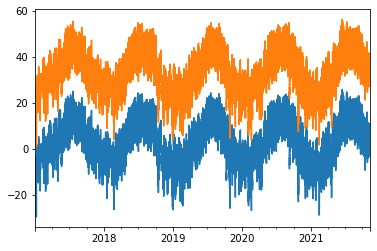

In [36]:
# Created a shifted NOAA dataset for ETS models

print(np.min(T_avg))

NOAA_min = abs(np.min(T_avg)) + 1

T_avg_shft = T_avg+NOAA_min
print(np.min(T_avg_shft))

T_avg.plot();
T_avg_shft.plot();

In [37]:
# Splitting shifted NOAA into train/test sets

## NOAA Dataset

# 80/20 split
T_avg_shft_train_1, T_avg_shft_test_1 = train_test_split(T_avg_shft, test_size=0.20, shuffle=False)

# 85/15 split
T_avg_shft_train_2, T_avg_shft_test_2 = train_test_split(T_avg_shft, test_size=0.15, shuffle=False)

# 90/10 split
T_avg_shft_train_3, T_avg_shft_test_3 = train_test_split(T_avg_shft, test_size=0.10, shuffle=False)

# Checks
print('\nNOAA')
print(len(T_avg_shft_test_1)/len(T_avg_shft))
print(len(T_avg_shft_test_2)/len(T_avg_shft))
print(len(T_avg_shft_test_3)/len(T_avg_shft))


NOAA
0.20001878110620716
0.15001408582965536
0.10000939055310358


In [38]:
# Building scaled datasets for the DL models
# I don't think it is necessary to scaler.transform the test sets?

# BTC
scaler_BTC_1 = MinMaxScaler()
scaler_BTC_1.fit(np.array(closes_train_1).reshape(-1,1))
scaled_closes_train_1 = scaler_BTC_1.transform(np.array(closes_train_1).reshape(-1,1))
scaled_closes_test_1 = scaler_BTC_1.transform(np.array(closes_test_1).reshape(-1,1))

scaler_BTC_2 = MinMaxScaler()
scaler_BTC_2.fit(np.array(closes_train_2).reshape(-1,1))
scaled_closes_train_2 = scaler_BTC_2.transform(np.array(closes_train_2).reshape(-1,1))
scaled_closes_test_2 = scaler_BTC_2.transform(np.array(closes_test_2).reshape(-1,1))

scaler_BTC_3 = MinMaxScaler()
scaler_BTC_3.fit(np.array(closes_train_3).reshape(-1,1))
scaled_closes_train_3 = scaler_BTC_3.transform(np.array(closes_train_3).reshape(-1,1))
scaled_closes_test_3 = scaler_BTC_3.transform(np.array(closes_test_3).reshape(-1,1))

# NOAA
scaler_NOAA_1 = MinMaxScaler()
scaler_NOAA_1.fit(np.array(T_avg_train_1).reshape(-1,1))
scaled_T_avg_train_1 = scaler_NOAA_1.transform(np.array(T_avg_train_1).reshape(-1,1))
scaled_T_avg_test_1 = scaler_NOAA_1.transform(np.array(T_avg_test_1).reshape(-1,1))

scaler_NOAA_2 = MinMaxScaler()
scaler_NOAA_2.fit(np.array(T_avg_train_2).reshape(-1,1))
scaled_T_avg_train_2 = scaler_NOAA_2.transform(np.array(T_avg_train_2).reshape(-1,1))
scaled_T_avg_test_2 = scaler_NOAA_2.transform(np.array(T_avg_test_2).reshape(-1,1))

scaler_NOAA_3 = MinMaxScaler()
scaler_NOAA_3.fit(np.array(T_avg_train_3).reshape(-1,1))
scaled_T_avg_train_3 = scaler_NOAA_3.transform(np.array(T_avg_train_3).reshape(-1,1))
scaled_T_avg_test_3 = scaler_NOAA_3.transform(np.array(T_avg_test_3).reshape(-1,1))

<a class = 'anchor' id = 'reset'></a>

### To reset the results_df, rerun the cell below

In [39]:
# Building a dataframe to store performance metrics for the models

# Three dfs, one for each train/test partition
col_names = np.array(['Model Class', 'Model Name', 'Dataset', 'Train/Test', 'RMSE', 'MAE', 'sMAPE', 'CC'])

results_df = pd.DataFrame(columns=col_names)
results_df

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC


# End Section 3
<a class = 'anchor' id = 'section4'></a>

# Section 4: Stationarity Testing for Datasets
* [Back to Top](#TOC)

This section involves running stationarity tests for both datasets. This was important for EDA and setting up model fitness tests from some of the classical models.

Most of the cells are commented-out to make the notebook intialization faster during model testing.

### BTC Dataset

In [40]:
# Function that runs the ADF test and outputs the conclusion

def adf_test(series, title = '', alpha = 0.05):
    """
    Function that runs the Augmented Dickey-Fuller test for time series to test for 
    stationarity using the given alpha value.
    
    INPUTS:
    *series: pandas series or numpy array representing the time series to test
    
    *title: optional title to print with test
    
    *alpha: flaot representing the significance level to test for, default is 5%
    
    OUTPUTS:
    Returns an ADF report stating if the series is stationary or not according to
    the unit root test conducted on the series.
    """
    
    print(f'Augmented Dickey-Fuller Test: {title}', '\n')
    # dropna() handles differenced data
    result = adfuller(series.dropna(), autolag = 'AIC')
    
    labels = ['ADF test statistic', 'p-value', 'n lags used', 'n observations']
    out = pd.Series(result[0:4], index = labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
    
    # Removes line "dtype: float64"
    print(out.to_string(), '\n')
    
    if result[1] <= alpha:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')

In [41]:
# This runs the ADF test on the raw data nd the data with differencing
# orders of d=1 and d=2

# We see that the original data in non-stationary and an order of d=1
# makes it stationary.

# for i in range(3):
#     if i == 0:
#         adf_test(closes)
#         print()
#     else:
#         adf_test(closes.diff(i))
#         print()

In [42]:
# # Plotting differenced series, d=1
# closes.diff(1).plot();
# plt.title('BTC Hourly Closes, Differenced by d=1')
# plt.xlabel('Time')
# plt.ylabel('Differenced Close Value');

In [43]:
# # Plotting ACF and PACF plots for raw data and differenced data
# rcParams['figure.figsize'] = 8, 4

# plot_acf(closes, lags = 30)
# plt.title('Autocorrelation for BTC Close Data')
# plt.xlabel('Number of Lags')
# plt.ylabel('Coefficient of Correlation');

# plot_pacf(closes, lags=30)
# plt.title('Partial Autocorrelation for BTC Close Data')
# plt.xlabel('Number of Lags')
# plt.ylabel('Coefficient of Partial Correlation');

# plot_acf(closes.diff(1)[1:], lags = 30)
# plt.title('Autocorrelation for Differenced BTC Close Data')
# plt.xlabel('Number of Lags')
# plt.ylabel('Coefficient of Correlation');

# plot_pacf(closes.diff(1)[1:], lags=30)
# plt.title('Partial Autocorrelation for Differenced BTC Close Data')
# plt.xlabel('Number of Lags')
# plt.ylabel('Coefficient of Partial Correlation');

In [44]:
# Differencing by an order of d=1 sufficiently removes autocorrelation

In [45]:
# Seasonal decomposition of BTC data
# seasonal_decompose(closes, period=1).plot();

In [46]:
# seasonal_decompose(closes.diff(1)[1:], period=1).plot();

In [47]:
# The above decompositions show that the BTC data has no seasonality, 
# and that all of it behavior is determined by a trend component and error.

# Same outcome for the differenced BTC data

### NOAA Dataset

In [48]:
# This runs the ADF test on the raw data nd the data with differencing
# orders of d=1 and d=2

# We see that the original data is already stationary.

# for i in range(3):
#     if i == 0:
#         adf_test(T_avg)
#         print()
#     else:
#         adf_test(T_avg.diff(i))
#         print()

In [49]:
# # Plot of average surface temp
# T_avg.plot();
# plt.title('Average Air Temperature');
# plt.xlabel('Time')
# plt.ylabel('Temperature (Celcius)');

In [50]:
# # Plot of average surface temp
# T_avg.diff(1).plot();
# plt.title('Average Air Temperature, Differenced by d=1');
# plt.xlabel('Time')
# plt.ylabel('Differenced Temperature (Celcius)');

In [51]:
# # Plotting ACF and PACF plots for raw data and differenced data
# rcParams['figure.figsize'] = 8, 4

# plot_acf(T_avg, lags = 30)
# plt.title('Autocorrelation for NOAA Weather Data')
# plt.xlabel('Number of Lags')
# plt.ylabel('Coefficient of Correlation');

# plot_pacf(T_avg, lags=30)
# plt.title('Partial Autocorrelation for NOAA Weather Data')
# plt.xlabel('Number of Lags')
# plt.ylabel('Coefficient of Partial Correlation');

# plot_acf(T_avg.diff(1)[1:], lags = 30)
# plt.title('Autocorrelation for Differenced NOAA Weather Data')
# plt.xlabel('Number of Lags')
# plt.ylabel('Coefficient of Correlation');

# plot_pacf(T_avg.diff(1)[1:], lags=30)
# plt.title('Partial Autocorrelation for Differenced NOAA Weather Data')
# plt.xlabel('Number of Lags')
# plt.ylabel('Coefficient of Partial Correlation');

In [52]:
# The graphs above show that there is seasonal fluctuations occuring 
# with a periodicity of either 3 or 24/25. 

# They also show that differencing sucessfully removes much of the
# autocorrelation form the original series.

In [53]:
# Seasonal decomposition of NOAA data
# seasonal_decompose(T_avg, period = 1).plot();

In [54]:
# Seasonal decomposition of differenced NOAA data
# seasonal_decompose(T_avg.diff(1)[1:], period = 1).plot();

# End Section 4
<a class = 'anchor' id = 'section5'></a>

# Section 5: General Model Functions
* [Back to Top](#TOC)

This section involves creating several general functions that will be used for the models in the following sections. This is also where the dataframes for the prediction values and fitted values are created. 

In [56]:
# General function that retrieves datasets and splits

def get_data(dataset, split_num, integer = False, scaled = False, shifted = False):
    '''
    Function that returns the correct train/test split for the given
    dataset. 
    
    If integer = True, it additionally returns the integer index
    for that given split. 
    
    If scaled = True, it additionally returns the scaled version for that given split.
    
    If shifted = True, it additionally returns the shifted version of that given split
    (only applicable for the NOAA dataset).
    
    INPUTS:
    *dataset: BTC or NOAA
    
    *split_num: 1, 2, or 3
    
    *integer: Bool representing if the integer index should be returned
    
    *scaled: Bool respresenting if the scaled dataset should be returned
    
    *shifted: Bool respresenting if the shifted version of the NOAA
    dataset should be returned
    '''
    
    # Integer selection
    if integer:
        
        # BTC dataset
        if dataset == 'BTC':

            # Split number selection
            if split_num == 1:
                training_set = closes_train_1
                test_set = closes_test_1
                training_int_set = closes_int_train_1
                test_int_set = closes_int_test_1
                
                return training_set, test_set, training_int_set, test_int_set

            elif split_num == 2:
                training_set = closes_train_2
                test_set = closes_test_2
                training_int_set = closes_int_train_2
                test_int_set = closes_int_test_2
                
                return training_set, test_set, training_int_set, test_int_set

            elif split_num == 3:
                training_set = closes_train_3
                test_set = closes_test_3
                training_int_set = closes_int_train_3
                test_int_set = closes_int_test_3
                
                return training_set, test_set, training_int_set, test_int_set
            
            # Incorrect split number entry
            else:
                raise NameError('Not a valid split number')

        # NOAA dataset
        elif dataset == 'NOAA':

            # Split number selection
            if split_num == 1:
                training_set = T_avg_train_1
                test_set = T_avg_test_1
                training_int_set = T_avg_int_train_1
                test_int_set = T_avg_int_test_1
                
                return training_set, test_set, training_int_set, test_int_set

            elif split_num == 2:
                training_set = T_avg_train_2
                test_set = T_avg_test_2
                training_int_set = T_avg_int_train_2
                test_int_set = T_avg_int_test_2
                
                return training_set, test_set, training_int_set, test_int_set

            elif split_num == 3:
                training_set = T_avg_train_3
                test_set = T_avg_test_3
                training_int_set = T_avg_int_train_3
                test_int_set = T_avg_int_test_3
                
                return training_set, test_set, training_int_set, test_int_set
            
            # Incorrect split number entry
            else:
                raise NameError('Not a valid split number')

        # Incorrect dataset entry
        else:
            raise NameError('Not a valid dataset name')
    
    # Scaled selection
    elif scaled:
        
        # BTC dataset
        if dataset == 'BTC':

            # Split number selection
            if split_num == 1:
                training_set = closes_train_1
                test_set = closes_test_1
                scaled_training_set = scaled_closes_train_1
                scaled_test_set = scaled_closes_test_1
                
                return training_set, test_set, scaled_training_set, scaled_test_set

            elif split_num == 2:
                training_set = closes_train_2
                test_set = closes_test_2
                scaled_training_set = scaled_closes_train_2
                scaled_test_set = scaled_closes_test_2
                
                return training_set, test_set, scaled_training_set, scaled_test_set

            elif split_num == 3:
                training_set = closes_train_3
                test_set = closes_test_3
                scaled_training_set = scaled_closes_train_3
                scaled_test_set = scaled_closes_test_3
                
                return training_set, test_set, scaled_training_set, scaled_test_set
            
            # Incorrect split number entry
            else:
                raise NameError('Not a valid split number')

        # NOAA dataset
        elif dataset == 'NOAA':

            # Split number selection
            if split_num == 1:
                training_set = T_avg_train_1
                test_set = T_avg_test_1
                scaled_training_set = scaled_T_avg_train_1
                scaled_test_set = scaled_T_avg_test_1 
                
                return training_set, test_set, scaled_training_set, scaled_test_set

            elif split_num == 2:
                training_set = T_avg_train_2
                test_set = T_avg_test_2
                scaled_training_set = scaled_T_avg_train_2
                scaled_test_set = scaled_T_avg_test_2
                
                return training_set, test_set, scaled_training_set, scaled_test_set

            elif split_num == 3:
                training_set = T_avg_train_3
                test_set = T_avg_test_3
                scaled_training_set = scaled_T_avg_train_3
                scaled_test_set = scaled_T_avg_test_3
                
                return training_set, test_set, scaled_training_set, scaled_test_set
            
            # Incorrect split number entry
            else:
                raise NameError('Not a valid split number')

        # Incorrect dataset entry
        else:
            raise NameError('Not a valid dataset name')
    
    
    # Shifted selection
    elif shifted:
        
       # BTC dataset
        if dataset == 'BTC':

            # Does not exist for BTC dataset
            raise NameError('There does not exist a shifted version of the BTC dataset')

        # NOAA dataset
        elif dataset == 'NOAA':

            # Split number selection
            if split_num == 1:
                training_set = T_avg_train_1
                test_set = T_avg_test_1
                training_shft_set = T_avg_shft_train_1
                test_shft_set = T_avg_shft_test_1
                
                return training_set, test_set, training_shft_set, test_shft_set

            elif split_num == 2:
                training_set = T_avg_train_2
                test_set = T_avg_test_2
                training_shft_set = T_avg_shft_train_2
                test_shft_set = T_avg_shft_test_2
                
                return training_set, test_set, training_shft_set, test_shft_set

            elif split_num == 3:
                training_set = T_avg_train_3
                test_set = T_avg_test_3
                training_shft_set = T_avg_shft_train_3
                test_shft_set = T_avg_shft_test_3
                
                return training_set, test_set, training_shft_set, test_shft_set
            
            # Incorrect split number entry
            else:
                raise NameError('Not a valid split number')

        # Incorrect dataset entry
        else:
            raise NameError('Not a valid dataset name')
    
    # No selection (normal datasets)
    else:
        
        # BTC dataset
        if dataset == 'BTC':

            # Split number selection
            if split_num == 1:
                training_set = closes_train_1
                test_set = closes_test_1
                
                return training_set, test_set

            elif split_num == 2:
                training_set = closes_train_2
                test_set = closes_test_2
                
                return training_set, test_set

            elif split_num == 3:
                training_set = closes_train_3
                test_set = closes_test_3
                
                return training_set, test_set
            
            # Incorrect split number entry
            else:
                raise NameError('Not a valid split number')

        # NOAA dataset
        elif dataset == 'NOAA':

            # Split number selection
            if split_num == 1:
                training_set = T_avg_train_1
                test_set = T_avg_test_1
                
                return training_set, test_set

            elif split_num == 2:
                training_set = T_avg_train_2
                test_set = T_avg_test_2
                
                return training_set, test_set

            elif split_num == 3:
                training_set = T_avg_train_3
                test_set = T_avg_test_3
                
                return training_set, test_set
            
            # Incorrect split number entry
            else:
                raise NameError('Not a valid split number')

        # Incorrect dataset entry
        else:
            raise NameError('Not a valid dataset name')

In [57]:
# General plotting function

def plot_results(training_set, test_set, predictions, model_name, dataset, other_set = None, legend = True):
    '''
    Function that plots the prediction values against the true training
    and test sets over the forecast period.
    
    INPUTS:
    *training_set: 1D array of the training data
    
    *test_set: 1D array of the test data
    
    *predictions: 1D array of the predicted values over the forecast
    horizon (length of test set)
    
    *model_name: string representing the name of the model
    (e.g., ARIMA, CART, RNN)
    
    *dataset: BTC or NOAA
    
    *other_set: optional, 1D array of the fitted values that the given 
    model computed on the training set when the model was fit
    
    *legend: Bool representing if a legend should be printed next to
    the plot, default is True
    
    OUTPUTS:
    A single plot of the given arrays. Includes automatically defined
    title, axes labels, and legend based on given inputs.
    '''
    rcParams['figure.figsize'] = 6,4
    training_set.plot(label = 'Training Set', c = 'midnightblue')
    test_set.plot(label = 'Test Set', c = 'slategray');
    predictions.plot(label = 'Predicted', c = 'r');
    if type(other_set) == type(pd.Series()):
        other_set.plot(label = 'Fitted Values', c = 'darkorange')
    if dataset == 'BTC':
        plt.ylabel('USD/BTC Spot Price')
    elif dataset == 'NOAA':
        plt.ylabel('Average Temperature (Celcius)')
    else:
        raise NameError('Not a valid dataset name')
    plt.xlabel('Time')
    plt.title(f'{model_name} Forecast for {dataset} Data');
    if legend:
        plt.legend(bbox_to_anchor = (1,1), loc = 'upper left');

In [58]:
# General function that computes and stores metrics

def get_metrics(test_set, predictions, model_name, dataset, split_num, CC, prints = True):
    '''
    Function that computes the RMSE, MAE, sMAPE, and computational 
    complexity (CC) score for the given prediction against the true test
    set values. Optionally allows the metrics to be printed.
    
    It also stores the metrics into the results dataframe, results_df.
    
    INPUTS:
    *test_set: 1D array of the test data
    
    *predictions: 1D array of the predicted values over the forecast
    horizon (length of test set)
    
    *model_name: string representing the name of the model
    (e.g., ARIMA, CART, RNN)
    
    *dataset: BTC or NOAA
    
    *CC: measure of computational complexity (e.g., run time of model)
    
    *prints: Bool representing if the metrics should be printed
    
    OUTPUTS:
    None if prints is False. Else, metrics are printed. 
    '''
    ## Compute metrics
    # Everything is rounded to two decimal places
    RMSE = np.round(rmse(test_set, predictions), 2)
    MAE = np.round(meanabs(test_set, predictions), 2)
    sMAPE = np.round(smape(test_set, predictions), 2)
    if model_name == 'Naive 1':
        CC = np.round(CC, 6)
    else:
        CC = np.round(CC, 2)
    
    # Optionally print metrics
    if prints:
        print('RMSE = ', RMSE)
        print('MAE = ', MAE)
        print('sMAPE = ', sMAPE)
        print('CC = ', CC, 'seconds')
    
    ## Store metrics into results dataframe
    
    # Obtain model class
    if model_name in ['Naive 1']:
        model_class = 'Benchmark'
        
    elif model_name in ['ARIMA', 'SARIMA']:
        model_class = 'Classical'
                        
    elif model_name[:3] == 'ETS':
        model_class = 'Classical'
        
    elif model_name in ['SVR', 'KNN', 'MLP', 'GP', 'CART']:
        model_class = 'Machine Learning'
        
    elif model_name in ['RNN', 'LSTM', 'GRU']:
        model_class = 'Deep Learning'
        
    else:
        raise NameError('Not a valid model name')
    
    # Appends to bottom of dataframe
    # [ModelClass, ModelName, Dataset, SplitNum, RMSE, MAE, sMAPE, CC]
    results_df.loc[len(results_df.index)] = [model_class, model_name, dataset, split_num, RMSE, MAE, sMAPE, CC]

In [59]:
# Create dataframes to store predicted and fitted values

# Dataframes for predicted values
df_preds_BTC = pd.DataFrame([], index = closes_test_1.index)
df_preds_NOAA = pd.DataFrame([], index = T_avg_test_1.index)

# Dataframes for fitted values
df_fits_BTC = pd.DataFrame([], index = closes_train_3.index)
df_fits_NOAA = pd.DataFrame([], index = T_avg_train_3.index)

In [60]:
# General function that stores predicted or fitted values 

def save_results(dataset, split_num, model_name, predictions, fitted_values = None):
    '''
    Function that stores the predicted values and (optionally) the
    fitted values from a given model into a Pandas dataframe. 
    It selects the corresponding dataframe according to the inputs.
    
    NOTE: This will overwrite any columns with the same model_name!
    
    INPUTS:
    *dataset: BTC or NOAA
    
    *split_num: 1, 2, or 3
    
    *model_name: string representing the model acronym
    (e.g., ARIMA, KNN, LSTM)
    
    *predictions: 1D array representing the predicted values for the
    given model over its forecast horizon
    
    *fitted_values: optional, 1D array representing the fitted values for the 
    given model over its training set
    
    OUTPUTS:
    None. It stores the array(s) for future reference.
    '''
    ## Select correct dataframe
    
    # BTC dataset
    if dataset == 'BTC':
        
        df_preds = df_preds_BTC
        df_fits = df_fits_BTC
     
    # NOAA dataset
    elif dataset == 'NOAA':
        
        df_preds = df_preds_NOAA
        df_fits = df_fits_NOAA

    # Incorrect dataset entry
    else:
        raise NameError('Not a valid dataset name')
        
    ## Store results into corresponding dataframe
    
    # Set model name to input into dataframe
    model_name = dataset+'_'+model_name+'_'+str(split_num)
    
    # Predicted values
    df_preds[model_name] = predictions
    
    # Optionally store fitted results, if available
    if type(fitted_values) != type(None):
        df_fits[model_name] = fitted_values

In [61]:
# Function undifferencing a differenced series

def undiff(series, init_val, index = None):
    '''
    Function that undifferences a differenced series. Useful for models in which
    differenced training data was given to generate differenced predictions, which 
    require a reverse differencing transformatin. Assumes the series was
    differenced only once.
    
    INPUTS:
    *series: pandas series or numpy array representing the differenced series
    
    * init_val: float representing the first value of the original, undifferenced series
    
    *index: optional, represents the index of a given pandas dataframe
    
    OUTPUTS:
    Pandas series containing the original undifferenced series with the given index.
    '''
    undiff_series = [init_val]
    
    for i in range(len(series)):
        undiff_series.append(undiff_series[i] + series[i])
        
    return pd.Series(undiff_series, index = index)

In [62]:
# General function that returns the correct scaler

def get_scaler(dataset, split_num):
    '''
    Function that returns the scaler object used on the given dataset and split.
    These must be different as they were fit on different datasets and splits.
    
    The MinMaxScaler class from sklearn was used for all dataset splits.
    
    INPUTS:
    *dataset: BTC or NOAA
    
    *split_num: 1, 2, or 3
    
    OUTPUTS:
    *scaler: MinMaxScaler object fit on the training set of the given dataset split
    '''
    if dataset == 'BTC':
        
        if split_num == 1:
            scaler = scaler_BTC_1
            
        elif split_num == 2:
            scaler = scaler_BTC_2
            
        elif split_num == 3:
            scaler = scaler_BTC_3
            
        else:
            raise NameError('Not a valid split number')
            
    elif dataset == 'NOAA':
        
        if split_num == 1:
            scaler = scaler_NOAA_1
            
        elif split_num == 2:
            scaler = scaler_NOAA_2
            
        elif split_num == 3:
            scaler = scaler_NOAA_3
            
        else:
            raise NameError('Not a valid split number')
            
    else:
        raise NameError('Not a valid dataset name')
        
    return scaler

# End Section 5
<a class = 'anchor' id = 'initial'></a>

# Initialize Here



Run all the cells above this one to initialize the document.
<a class = 'anchor' id = 'section6'></a>

# Section 6: Benchmark Model
* [Back to Top](#TOC)

This section creates the benchmark model, runs it on the dataset splits, and stores their values. 

The benchmark models ran so fast, that many time the run time measure was zero, amking it difficult to record an accurate run time measurement. So the benchmark model was ran multiple times and the average of the nonzero measurements was saved as the run time measure for that data split. It was also assumed that the run times for the splits with smaller test sets will have lower run time measurements.

In [325]:
def Naive1(series, f_len):
    '''
    Function that creates a Naive 1 time series forecast prediction
    of integer length f_len given some series. Also called a random walk process.
    
    Returns the forecasted values of length f_len
    (i.e., if series has index 1,..., n, then the forecast has index n+1,...,n+f_len)
    
    INPUTS:
    *series: pandas Series or numpy array
    
    *f_len: integer representing the desired length of the forecast
    
    OUTPUTS:
    Numpy array containg the last value of the passed in series of length f_len
    '''
    
    # Retrieve last value of given series 
    # and set forecast to be the last value repeated for length f_len
    return np.repeat(series[-1], f_len)

### Running benchmark forecasts for both datasets

In [326]:
# BTC

CC_BTC_N1 = []
CC_BTC_N2 = []
CC_BTC_N3 = []

n_runs = 0
condition = False
n_runs_min = 10**3
n_runs_max = 10**4

while not condition:
    
    # Saving run times for CC calculations
    t = time()
    BTC_naive1_1_pred = Naive1(closes_train_1, len(closes_test_1))
    CC_BTC_N1.append(time() - t)

    t = time()
    BTC_naive1_2_pred = Naive1(closes_train_2, len(closes_test_2))
    CC_BTC_N2.append(time() - t)

    t = time()
    BTC_naive1_3_pred = Naive1(closes_train_3, len(closes_test_3))
    CC_BTC_N3.append(time() - t)
    
    # Dropping zeros values and computing average
    CC_BTC_naive1_1 = np.array(list(filter(lambda num: num != 0, CC_BTC_N1))).mean()
    CC_BTC_naive1_2 = np.array(list(filter(lambda num: num != 0, CC_BTC_N2))).mean()
    CC_BTC_naive1_3 = np.array(list(filter(lambda num: num != 0, CC_BTC_N3))).mean()
    
    n_runs += 1
    
    if n_runs <= n_runs_min:
        continue
    elif n_runs == n_runs_max:
        break
    
    if CC_BTC_naive1_1 > CC_BTC_naive1_2 and CC_BTC_naive1_2 > CC_BTC_naive1_3:
        condition = True

# Prints        
print(n_runs)
print(CC_BTC_naive1_1)
print(CC_BTC_naive1_2)
print(CC_BTC_naive1_3)
print(condition)

3445
0.0025354561052824322
0.0024716196389033876
0.002145960217430478
True


In [327]:
# NOAA

CC_NOAA_N1 = []
CC_NOAA_N2 = []
CC_NOAA_N3 = []

n_runs = 0
condition = False
n_runs_min = 10**3
n_runs_max = 10**4

while not condition:
    
    # Saving run times for CC calculations
    t = time()
    NOAA_naive1_1_pred = Naive1(T_avg_train_1, len(T_avg_test_1))
    CC_NOAA_N1.append(time() - t)

    t = time()
    NOAA_naive1_2_pred = Naive1(T_avg_train_2, len(T_avg_test_2))
    CC_NOAA_N2.append(time() - t)

    t = time()
    NOAA_naive1_3_pred = Naive1(T_avg_train_3, len(T_avg_test_3))
    CC_NOAA_N3.append(time() - t)
    
    # Dropping zeros values and computing average
    CC_NOAA_naive1_1 = np.array(list(filter(lambda num: num != 0, CC_NOAA_N1))).mean()
    CC_NOAA_naive1_2 = np.array(list(filter(lambda num: num != 0, CC_NOAA_N2))).mean()
    CC_NOAA_naive1_3 = np.array(list(filter(lambda num: num != 0, CC_NOAA_N3))).mean()
    
    n_runs += 1
    
    if n_runs <= n_runs_min:
        continue
    elif n_runs == n_runs_max:
        break
    
    if CC_NOAA_naive1_1 > CC_NOAA_naive1_2 and CC_NOAA_naive1_2 > CC_NOAA_naive1_3:
        condition = True

# Prints        
print(n_runs)
print(CC_NOAA_naive1_1)
print(CC_NOAA_naive1_2)
print(CC_NOAA_naive1_3)
print(condition)

1001
0.005529505865914481
0.00536036491394043
0.004966139793395996
True


In [328]:
## Converting to Pandas series and setting index
BTC_naive1_1_pred = pd.Series(BTC_naive1_1_pred, index = closes_test_1.index)
BTC_naive1_2_pred = pd.Series(BTC_naive1_2_pred, index = closes_test_2.index)
BTC_naive1_3_pred = pd.Series(BTC_naive1_3_pred, index = closes_test_3.index)

NOAA_naive1_1_pred = pd.Series(NOAA_naive1_1_pred, index = T_avg_test_1.index)
NOAA_naive1_2_pred = pd.Series(NOAA_naive1_2_pred, index = T_avg_test_2.index)
NOAA_naive1_3_pred = pd.Series(NOAA_naive1_3_pred, index = T_avg_test_3.index)

## Storing predictions to dataframe
save_results('BTC', 1, 'Benchmark', BTC_naive1_1_pred)
save_results('BTC', 2, 'Benchmark', BTC_naive1_2_pred)
save_results('BTC', 3, 'Benchmark', BTC_naive1_3_pred)

save_results('NOAA', 1, 'Benchmark', NOAA_naive1_1_pred)
save_results('NOAA', 2, 'Benchmark', NOAA_naive1_2_pred)
save_results('NOAA', 3, 'Benchmark', NOAA_naive1_3_pred)

## Calculating and storing benchmark metrics

model_name = 'Naive 1'

# BTC
dataset = 'BTC'
get_metrics(closes_test_1, BTC_naive1_1_pred, model_name, dataset, 1, CC_BTC_naive1_1, prints=False)
get_metrics(closes_test_2, BTC_naive1_2_pred, model_name, dataset, 2, CC_BTC_naive1_2, prints=False)
get_metrics(closes_test_3, BTC_naive1_3_pred, model_name, dataset, 3, CC_BTC_naive1_3, prints=False)

# NOAA
dataset = 'NOAA'
get_metrics(T_avg_test_1, NOAA_naive1_1_pred, model_name, dataset, 1, CC_NOAA_naive1_1, prints=False)
get_metrics(T_avg_test_2, NOAA_naive1_2_pred, model_name, dataset, 2, CC_NOAA_naive1_2, prints=False)
get_metrics(T_avg_test_3, NOAA_naive1_3_pred, model_name, dataset, 3, CC_NOAA_naive1_3, prints=False)

del dataset, model_name

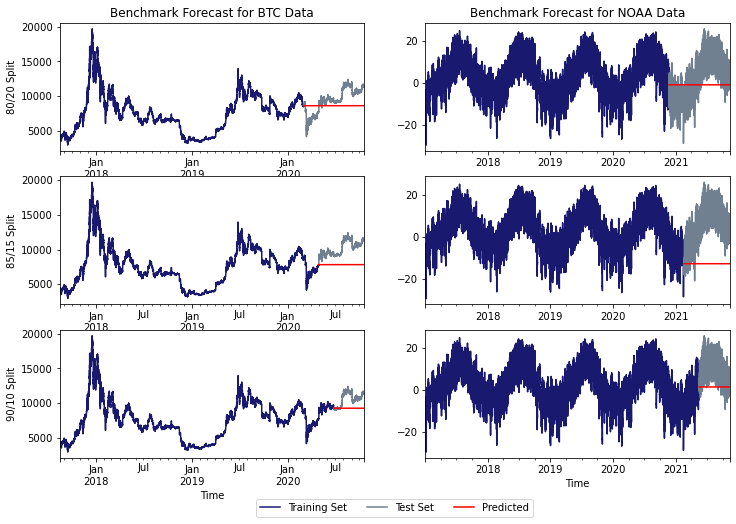

In [334]:
rcParams['figure.figsize'] = 12, 8

# BTC Plots 
plt.subplot(3, 2, 1)
plot_results(closes_train_1, closes_test_1, BTC_naive1_1_pred, 'Benchmark', 'BTC', legend = False)
plt.tick_params(axis = 'x', which='minor', labelbottom=False)

plt.xlabel('')
plt.ylabel('80/20 Split')

plt.subplot(3, 2, 3)
plot_results(closes_train_2, closes_test_2, BTC_naive1_2_pred, 'Benchmark', 'BTC', legend = False)
plt.xlabel('')
plt.ylabel('85/15 Split')
plt.title('')

plt.subplot(3, 2, 5)
plot_results(closes_train_3, closes_test_3, BTC_naive1_3_pred, 'Benchmark', 'BTC', legend = False)
plt.ylabel('90/10 Split')
plt.title('')

# NOAA plots
plt.subplot(3, 2, 2)
plot_results(T_avg_train_1, T_avg_test_1, NOAA_naive1_1_pred, 'Benchmark', 'NOAA', legend = False)
plt.xlabel('')
plt.ylabel('')

plt.subplot(3, 2, 4)
plot_results(T_avg_train_2, T_avg_test_2, NOAA_naive1_2_pred, 'Benchmark', 'NOAA', legend = False)
plt.xlabel('')
plt.ylabel('')
plt.title('')

plt.subplot(3, 2, 6)
plot_results(T_avg_train_3, T_avg_test_3, NOAA_naive1_3_pred, 'Benchmark', 'NOAA', legend = False)
plt.ylabel('')
plt.title('');

plt.legend(bbox_to_anchor = (-0.1, -0.5), loc = 'lower center', ncol = 3);

In [1]:
# Check
# results_df

In [2]:
# Check
# df_preds_BTC

In [3]:
# Check
# df_preds_NOAA

# End Section 6
<a class = 'anchor' id = 'section7'></a>

# Section 7: SARIMA Models
* [Back to Top](#TOC)

This section creates the SARIMA model function and runs it on all of the dataset splits.

In [174]:
# General SARIMA function

def model_SARIMA(dataset, split_num, order = (1,1,1), seas_order = (0,0,0,0), fitted_set = False, plot_fits = False):
    '''
    Function that runs the SARIMA (or ARIMA) class of models on the
    given data.
    
    INPUTS:
    *dataset: BTC or NOAA
    
    *split_num: 1, 2, or 3
    
    *order: 3-tuple of ARIMA order, e.g., (1, 1, 1)
    
    *seas_order: 4-tuple of SARIMA order, e.g., (1, 1, 0, 24),
    if seas_order = (0,0,0,0) then the model has no seasonality
    (i.e., it is an ARIMA model, not a SARIMA model)
    
    *fitted_set: Bool representing if the fitted values should be ran
    for this model, default is False
    
    *plot_fits: Bool representing if the fitted values should be plotted, 
    default is False
    
    OUTPUTS:
    Performance metrics and graphs of predictions. Automatically stores results
    into the results dataframe.
    '''
    # Retrieve model name
    if seas_order == (0,0,0,0):
        model_name = 'ARIMA'
    else:
        model_name = 'SARIMA'
    
    # Retrieve datasets
    training_set, test_set = get_data(dataset, split_num)
    
    # Define SARIMA model and fit, recording time
    t = time()
    model = arima.ARIMA(order, seas_order).fit(training_set)
    predictions = model.predict(len(test_set))
    CC = time() - t
    
    # Convert predictions to Pandas series and set index
    predictions = pd.Series(predictions, index = test_set.index)
    
    # Optionally run fitted values and convert
    if fitted_set:
        fitted_values = model.predict(len(training_set))
        fitted_values = pd.Series(fitted_values, index = training_set.index)
    
    # Store results into dataframe
    if fitted_set:
        save_results(dataset, split_num, model_name, predictions, fitted_values=fitted_values)
    else:
        save_results(dataset, split_num, model_name, predictions)
    
    # Plots
    if plot_fits:
        plot_results(training_set, test_set, predictions, model_name, dataset, fitted_values)
    else:
        plot_results(training_set, test_set, predictions, model_name, dataset)
    
    # Metrics
    get_metrics(test_set, predictions, model_name, dataset, split_num, CC)

<a class = 'anchor' id = 'section7.1'></a>

### Section 7.1: ARIMA
* [Back to Section](#section7)
* [Back to Top](#TOC)

RMSE =  1496.72
MAE =  1186.84
sMAPE =  13.2
CC =  4.57 seconds


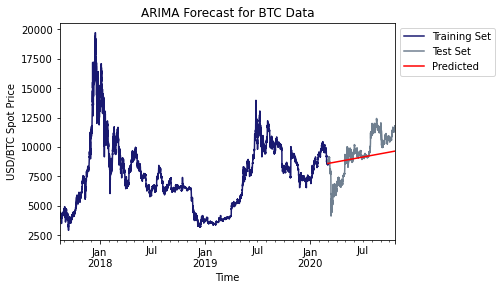

In [175]:
# ARIMA Model for BTC - 1
model_SARIMA('BTC', 1, fitted_set=True)

RMSE =  2266.42
MAE =  2086.83
sMAPE =  22.31
CC =  5.13 seconds


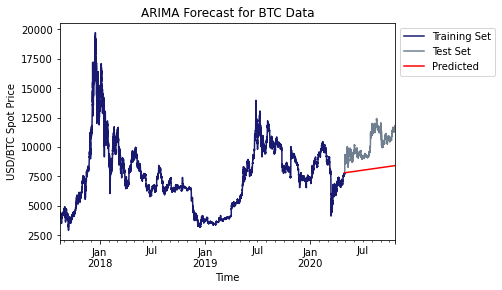

In [176]:
# ARIMA Model for BTC - 2
model_SARIMA('BTC', 2, fitted_set=True)

RMSE =  1406.61
MAE =  1159.11
sMAPE =  11.14
CC =  5.15 seconds


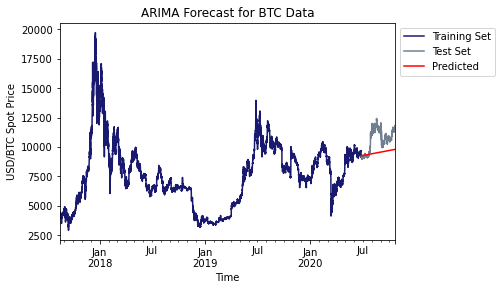

In [177]:
# ARIMA Model for BTC - 3
model_SARIMA('BTC', 3, fitted_set=True)

RMSE =  9.81
MAE =  8.02
sMAPE =  182.74
CC =  4.63 seconds


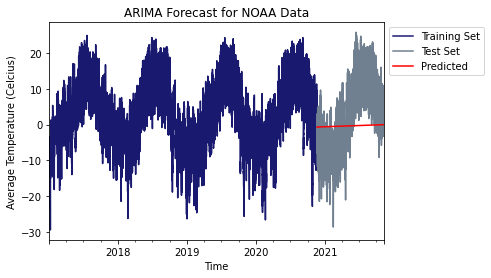

In [178]:
# ARIMA Model for NOAA - 1
model_SARIMA('NOAA', 1, fitted_set=True)

RMSE =  20.98
MAE =  18.98
sMAPE =  169.17
CC =  4.83 seconds


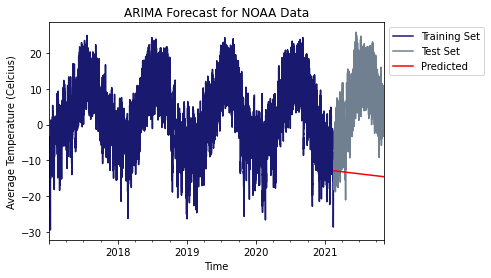

In [179]:
# ARIMA Model for NOAA - 2
model_SARIMA('NOAA', 2, fitted_set=True)

RMSE =  10.15
MAE =  8.41
sMAPE =  135.56
CC =  5.65 seconds


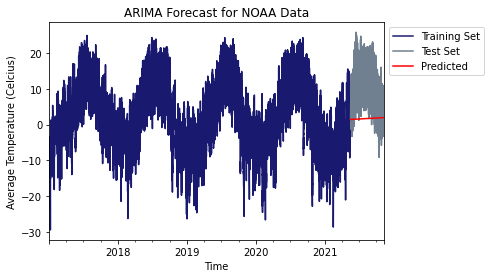

In [180]:
# ARIMA Model for NOAA - 3
model_SARIMA('NOAA', 3, fitted_set=True)

<a class = 'anchor' id = 'section7.2'></a>

### Section 7.2: SARIMA
* [Back to Section](#section7)
* [Back to Top](#TOC)

RMSE =  4363.39
MAE =  3675.87
sMAPE =  47.11
CC =  250.69 seconds


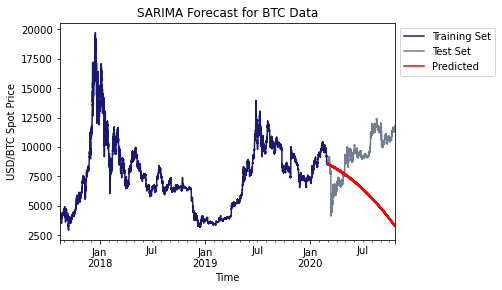

In [182]:
# SARIMA Model for BTC - 1
model_SARIMA('BTC', 1, seas_order=(1, 1, 0, 24), fitted_set=True)

RMSE =  3209.62
MAE =  2941.84
sMAPE =  33.21
CC =  235.98 seconds


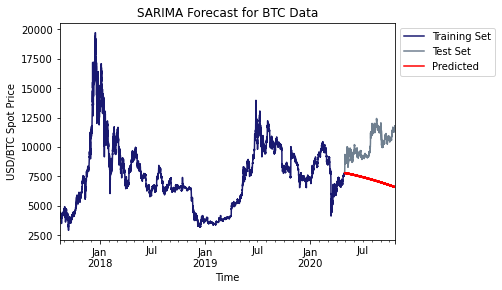

In [183]:
# SARIMA Model for BTC - 2
model_SARIMA('BTC', 2, seas_order=(1, 1, 0, 24), fitted_set=True)

RMSE =  1762.73
MAE =  1490.31
sMAPE =  14.65
CC =  249.51 seconds


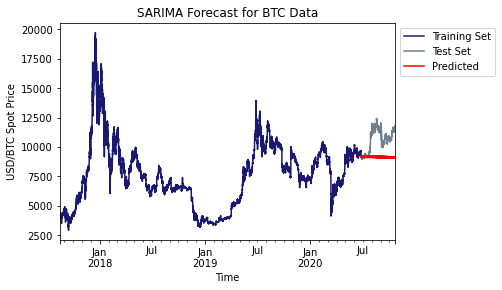

In [184]:
# SARIMA Model for BTC - 3
model_SARIMA('BTC', 3, seas_order=(1, 1, 0, 24), fitted_set=True)

RMSE =  1323.37
MAE =  1136.01
sMAPE =  195.45
CC =  85.35 seconds


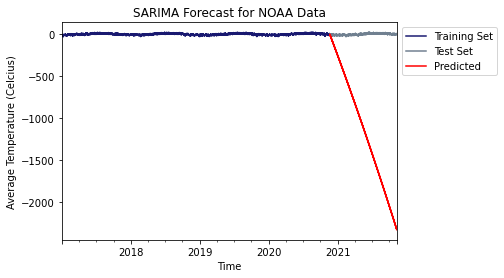

In [185]:
# SARIMA Model for NOAA - 1
model_SARIMA('NOAA', 1, seas_order=(1, 1, 0, 24), fitted_set=True)

RMSE =  39.73
MAE =  29.49
sMAPE =  126.54
CC =  90.45 seconds


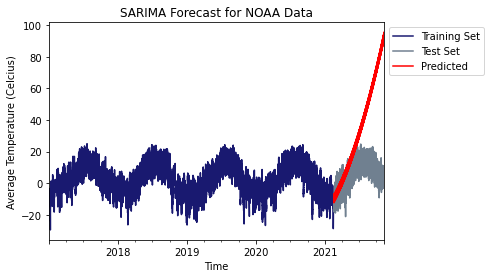

In [186]:
# SARIMA Model for NOAA - 2
model_SARIMA('NOAA', 2, seas_order=(1, 1, 0, 24), fitted_set=True)

RMSE =  78.08
MAE =  64.01
sMAPE =  136.61
CC =  101.21 seconds


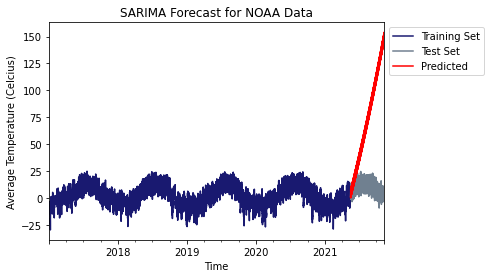

In [187]:
# SARIMA Model for NOAA - 3
model_SARIMA('NOAA', 3, seas_order=(1, 1, 0, 24), fitted_set=True)

In [188]:
# Check
results_df

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Benchmark,Naive 1,BTC,1,1892.77,1624.37,18.04,0.001585
1,Benchmark,Naive 1,BTC,2,2584.71,2380.67,25.90,0.001910
2,Benchmark,Naive 1,BTC,3,1673.10,1408.91,13.77,0.001684
3,Benchmark,Naive 1,NOAA,1,10.06,8.21,172.67,0.004311
4,Benchmark,Naive 1,NOAA,2,20.11,18.12,168.59,0.001568
...,...,...,...,...,...,...,...,...
92,Classical,SARIMA,BTC,2,3209.62,2941.84,33.21,235.980000
93,Classical,SARIMA,BTC,3,1762.73,1490.31,14.65,249.510000
94,Classical,SARIMA,NOAA,1,1323.37,1136.01,195.45,85.350000
95,Classical,SARIMA,NOAA,2,39.73,29.49,126.54,90.450000


In [189]:
# Check
df_preds_BTC

,BTC_Benchmark_1,BTC_Benchmark_2,BTC_Benchmark_3,BTC_ARIMA_1,BTC_ARIMA_2,BTC_ARIMA_3,BTC_SARIMA_1,BTC_SARIMA_2,BTC_SARIMA_3
2020-03-02 04:00:00,8601.99,NaN,NaN,8600.205089,NaN,NaN,8599.880529,NaN,NaN
2020-03-02 05:00:00,8601.99,NaN,NaN,8599.260735,NaN,NaN,8618.273184,NaN,NaN
2020-03-02 06:00:00,8601.99,NaN,NaN,8598.798879,NaN,NaN,8567.720570,NaN,NaN
2020-03-02 07:00:00,8601.99,NaN,NaN,8598.613989,NaN,NaN,8588.015443,NaN,NaN
2020-03-02 08:00:00,8601.99,NaN,NaN,8598.588083,NaN,NaN,8586.849052,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-10-19 23:00:00,8601.99,7815.3,9246.83,9645.240124,8412.115230,9790.542741,3243.519060,6616.554561,9104.177374
2020-10-20 00:00:00,8601.99,7815.3,9246.83,9645.428456,8412.260645,9790.737170,3268.963712,6598.246826,9119.749255
2020-10-20 01:00:00,8601.99,7815.3,9246.83,9645.616789,8412.406061,9790.931600,3302.931472,6595.633020,9107.938867
2020-10-20 02:00:00,8601.99,7815.3,9246.83,9645.805121,8412.551476,9791.126029,3342.702820,6613.106200,9106.961622


In [190]:
# Check
df_fits_BTC

,BTC_ARIMA_1,BTC_ARIMA_2,BTC_ARIMA_3,BTC_SARIMA_1,BTC_SARIMA_2,BTC_SARIMA_3
2017-08-17 04:00:00,8600.205089,7811.166403,9248.426950,8599.880529,7803.232280,9258.679950
2017-08-17 05:00:00,8599.260735,7808.890258,9249.409023,8618.273184,7787.941551,9291.020904
2017-08-17 06:00:00,8598.798879,7807.665273,9250.045786,8567.720570,7767.454503,9302.502189
2017-08-17 07:00:00,8598.613989,7807.035157,9250.488627,8588.015443,7786.098043,9224.226640
2017-08-17 08:00:00,8598.588083,7806.741687,9250.822562,8586.849052,7779.107403,9290.637007
...,...,...,...,...,...,...
2020-06-25 23:00:00,NaN,NaN,14120.873455,NaN,NaN,1796.838762
2020-06-26 00:00:00,NaN,NaN,14121.067885,NaN,NaN,1811.868868
2020-06-26 01:00:00,NaN,NaN,14121.262314,NaN,NaN,1799.516704
2020-06-26 02:00:00,NaN,NaN,14121.456743,NaN,NaN,1797.997684


In [191]:
# Check
df_preds_NOAA

,NOAA_Benchmark_1,NOAA_Benchmark_2,NOAA_Benchmark_3,NOAA_ARIMA_1,NOAA_ARIMA_2,NOAA_ARIMA_3,NOAA_SARIMA_1,NOAA_SARIMA_2,NOAA_SARIMA_3
2020-11-20 21:00:00,-0.8,NaN,NaN,-0.712234,NaN,NaN,-0.453687,NaN,NaN
2020-11-20 22:00:00,-0.8,NaN,NaN,-0.679405,NaN,NaN,-1.299569,NaN,NaN
2020-11-20 23:00:00,-0.8,NaN,NaN,-0.667094,NaN,NaN,-2.309464,NaN,NaN
2020-11-21 00:00:00,-0.8,NaN,NaN,-0.662448,NaN,NaN,-3.735613,NaN,NaN
2020-11-21 01:00:00,-0.8,NaN,NaN,-0.660663,NaN,NaN,-4.461758,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-11-10 16:00:00,-0.8,-12.9,1.5,0.003684,-14.590786,1.982912,-2333.065752,92.202719,154.016932
2021-11-10 17:00:00,-0.8,-12.9,1.5,0.003762,-14.591046,1.983036,-2332.275444,93.416609,153.569757
2021-11-10 18:00:00,-0.8,-12.9,1.5,0.003840,-14.591306,1.983160,-2330.950346,94.434542,152.557411
2021-11-10 19:00:00,-0.8,-12.9,1.5,0.003918,-14.591566,1.983284,-2330.566595,95.017768,151.906822


In [192]:
# Check
df_fits_NOAA

,NOAA_ARIMA_1,NOAA_ARIMA_2,NOAA_ARIMA_3,NOAA_SARIMA_1,NOAA_SARIMA_2,NOAA_SARIMA_3
2017-01-01 01:00:00,-0.712234,-12.919580,1.471842,-0.453687,-12.192346,1.668793
2017-01-01 02:00:00,-0.679405,-12.927095,1.461370,-1.299569,-11.355832,0.178778
2017-01-01 03:00:00,-0.667094,-12.930080,1.457525,-2.309464,-10.155622,0.472411
2017-01-01 04:00:00,-0.662448,-12.931363,1.456162,-3.735613,-9.246336,0.847451
2017-01-01 05:00:00,-0.660663,-12.932008,1.455729,-4.461758,-8.740115,2.154192
...,...,...,...,...,...,...
2021-05-17 04:00:00,NaN,NaN,6.211485,NaN,NaN,2851.892555
2021-05-17 05:00:00,NaN,NaN,6.211609,NaN,NaN,2853.352683
2021-05-17 06:00:00,NaN,NaN,6.211733,NaN,NaN,2858.719543
2021-05-17 07:00:00,NaN,NaN,6.211857,NaN,NaN,2859.938110


# End Section 7
<a class = 'anchor' id = 'section8'></a>

# Section 8: ETS Models
* [Back to Top](#TOC)

This section creates the ETS model function and runs it on all of the dataset splits. 

Note: This section also includes two additional models not included in the paper: the multiplicative seasonal models (e.g., S = M).

In [193]:
# Attempt to build general ETS function

def model_ETS(dataset, split_num, ETS_name, period = None, fitted_set = False, plot_fits = False):
    '''
    Function that performs the ETS class of models on the given data.
    
    
    INPUTS:
    *dataset: BTC or NOAA
    
    *split_num: 1, 2, or 3
    
    *ETS_name: 3-letter string of ETS acronym corresponding to the 
    error (E), trend (T), and seasonal (S) components of the model,
    each must be an element of the set {N, A, M}
    
    *period: intger representing the number of observations in a 
    seasonal period, needed if the seasonal component is not N
    
    *fitted_set: Bool representing if the fitted values should be ran
    for this model, default is False
    
    *plot_fits: Bool representing if the fitted values should be plotted, 
    default is False
    
    OUTPUTS:
    Performance metrics and graphs of predictions. Automatically stores results
    into the results dataframe.
    '''
    ## Retrieve ETS model parameters
    
    # Error component
    if ETS_name[0] == 'N':
        error = None
    elif ETS_name[0] == 'A':
        error = 'add'
    elif ETS_name[0] == 'M':
        error = 'mul'
    else:
        raise NameError('Not a valid Trend acronym')
    
    # Trend component
    if ETS_name[1] == 'N':
        trend = None
    elif ETS_name[1] == 'A':
        trend = 'add'
    elif ETS_name[1] == 'M':
        trend = 'mul'
    else:
        raise NameError('Not a valid Trend acronym')
        
    # Seasonality component
    if ETS_name[2] == 'N':
        seasonal = None
    elif ETS_name[2] == 'A':
        seasonal = 'add'
        if period == None:
            raise TypeError('Need to input value for period')
    elif ETS_name[2] == 'M':
        seasonal = 'mul'
        if period == None:
            raise TypeError('Need to input value for period')
    else:
        raise NameError('Not a valid Trend acronym')
    
    # Retrieve model name
    model_name = 'ETS - '+ETS_name
    
    # Decide if a shifted dataset is needed and retrieve datasets
    if dataset == 'NOAA' and 'mul' in [error, trend, seasonal]:
        training_set, test_set, shft_training_set, shft_test_set = get_data(dataset, split_num, shifted = True)
        run_set = shft_training_set
        reshift = True
    else:
        training_set, test_set = get_data(dataset, split_num)
        run_set = training_set
        reshift = False
    
    # Define ETS model and fit, recording time
    t = time()
    model = ETSModel(endog = run_set, error = error, 
                     trend = trend, seasonal = seasonal,
                    seasonal_periods = period).fit()
    predictions = model.forecast(steps = len(test_set))
    CC = time() - t
    
    # Convert predictions to Pandas series and set index
    predictions = pd.Series(predictions, index = test_set.index)
    
    # Optionally run fitted values and convert
    if fitted_set:
        fitted_values = model.predict()
        fitted_values = pd.Series(fitted_values, index = training_set.index)
        
    # Store results into dataframe
    if fitted_set:
        save_results(dataset, split_num, model_name, predictions, fitted_values)
    else:
        save_results(dataset, split_num, model_name, predictions)
    
    # Reshift, if necessary
    if reshift:
        predictions = predictions - NOAA_min
    
    # Plots
    if plot_fits:
        plot_results(training_set, test_set, predictions, model_name, dataset, fitted_values)
    else:
        plot_results(training_set, test_set, predictions, model_name, dataset)
    
    # Metrics
    print('ETS Type: ', model.short_name)
    get_metrics(test_set, predictions, model_name, dataset, split_num, CC)

<a class = 'anchor' id = 'section8.1'></a>

### Section 8.1: ETS - AAN
**Holt Linear w/ Additive Trend**
* [Back to Section](#section8)
* [Back to Top](#TOC)

ETS Type:  AAN
RMSE =  2980.57
MAE =  2599.96
sMAPE =  30.3
CC =  0.98 seconds


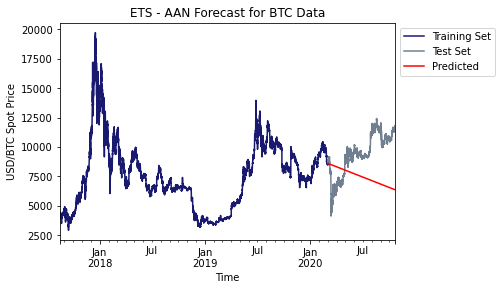

In [194]:
# ETS-AAN Model for BTC - 1
model_ETS('BTC', 1, 'AAN', fitted_set=True)

ETS Type:  AAN
RMSE =  1544.82
MAE =  1379.75
sMAPE =  14.23
CC =  0.99 seconds


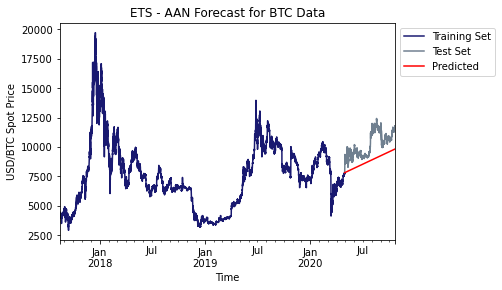

In [195]:
# ETS-AAN Model for BTC - 2
model_ETS('BTC', 2, 'AAN', fitted_set=True)

ETS Type:  AAN
RMSE =  1270.24
MAE =  1024.17
sMAPE =  9.77
CC =  0.86 seconds


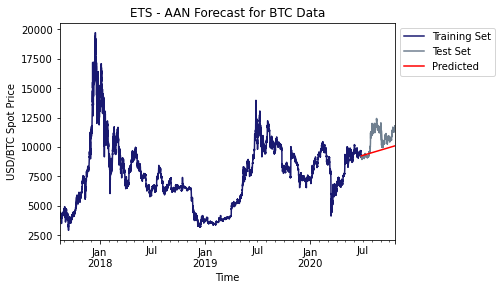

In [196]:
# ETS-AAN Model for BTC - 3
model_ETS('BTC', 3, 'AAN', fitted_set=True)

ETS Type:  AAN
RMSE =  11.28
MAE =  9.24
sMAPE =  161.1
CC =  1.4 seconds


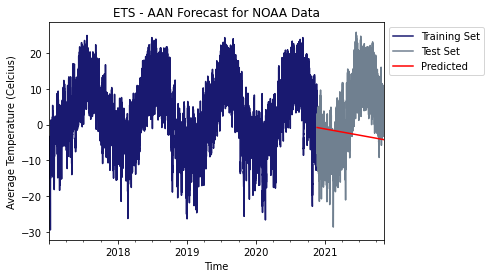

In [197]:
# ETS-AAN Model for NOAA - 1
model_ETS('NOAA', 1, 'AAN', fitted_set=True)

ETS Type:  AAN
RMSE =  24.87
MAE =  22.67
sMAPE =  171.1
CC =  1.78 seconds


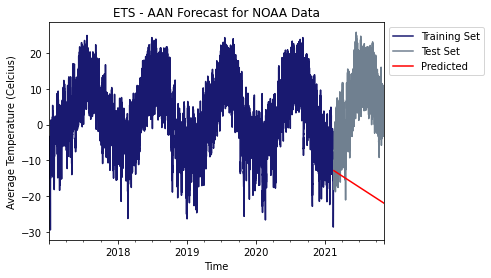

In [198]:
# ETS-AAN Model for NOAA - 2
model_ETS('NOAA', 2, 'AAN', fitted_set=True)

ETS Type:  AAN
RMSE =  10.15
MAE =  8.41
sMAPE =  135.85
CC =  1.8 seconds


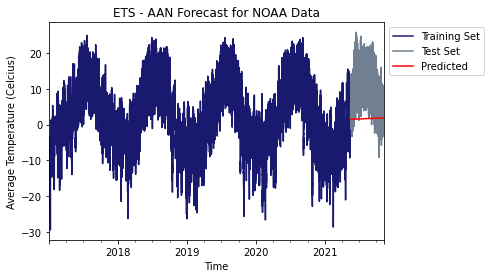

In [199]:
# ETS-AAN Model for NOAA - 3
model_ETS('NOAA', 3, 'AAN', fitted_set=True)

<a class = 'anchor' id = 'section8.2'></a>

### Section 8.2: ETS - AMN
**Holt linear w/ Multiplicative Trend**
* [Back to Section](#section8)
* [Back to Top](#TOC)

ETS Type:  AMN
RMSE =  1492.98
MAE =  1182.95
sMAPE =  13.16
CC =  0.98 seconds


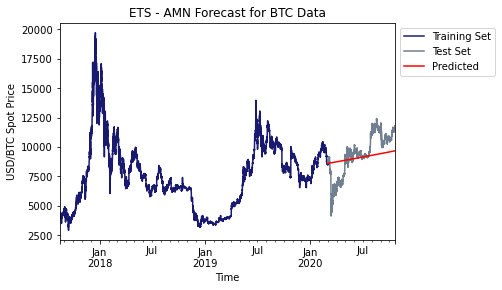

In [200]:
# ETS-AMN Model for BTC - 1
model_ETS('BTC', 1, 'AMN', fitted_set=True)

ETS Type:  AMN
RMSE =  2177.3
MAE =  2002.68
sMAPE =  21.31
CC =  1.09 seconds


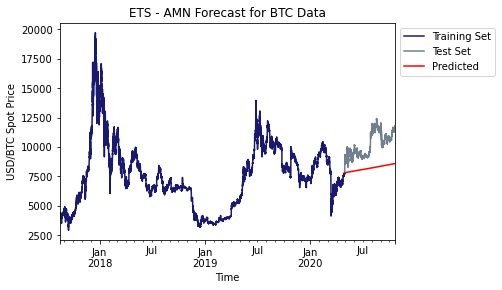

In [201]:
# ETS-AMN Model for BTC - 2
model_ETS('BTC', 2, 'AMN', fitted_set=True)

ETS Type:  AMN
RMSE =  1207.65
MAE =  957.34
sMAPE =  9.1
CC =  1.06 seconds


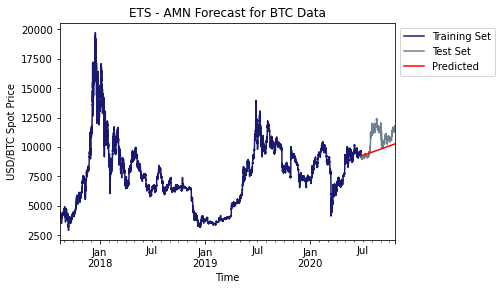

In [202]:
# ETS-AMN Model for BTC - 3
model_ETS('BTC', 3, 'AMN', fitted_set=True)

ETS Type:  AMN
RMSE =  32480.21
MAE =  15813.01
sMAPE =  197.7
CC =  1.17 seconds


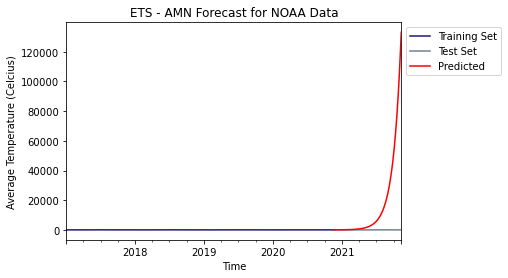

In [203]:
# ETS-AMN Model for NOAA - 1
model_ETS('NOAA', 1, 'AMN', fitted_set=True)

ETS Type:  AMN
RMSE =  6819.78
MAE =  3541.11
sMAPE =  185.26
CC =  1.05 seconds


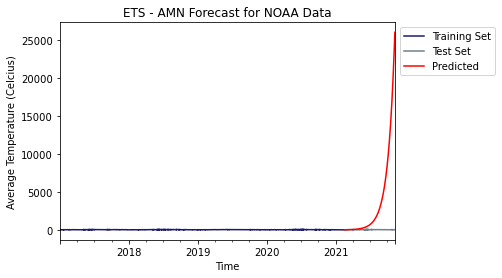

In [204]:
# ETS-AMN Model for NOAA - 2
model_ETS('NOAA', 2, 'AMN', fitted_set=True)

ETS Type:  AMN
RMSE =  1622.7
MAE =  983.98
sMAPE =  167.98
CC =  1.26 seconds


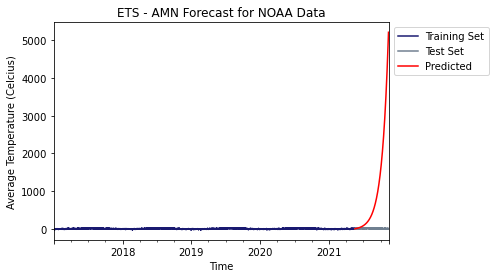

In [205]:
# ETS-AMN Model for NOAA - 3
model_ETS('NOAA', 3, 'AMN', fitted_set=True)

<a class = 'anchor' id = 'section8.3'></a>

### Section 8.3: ETS - AAA
**Holt-Winters Seasonal w/ Additive Trend and 24-period Additive Seasonality**
* [Back to Section](#section8)
* [Back to Top](#TOC)

ETS Type:  AAA
RMSE =  1736.22
MAE =  1462.47
sMAPE =  16.2
CC =  12.95 seconds


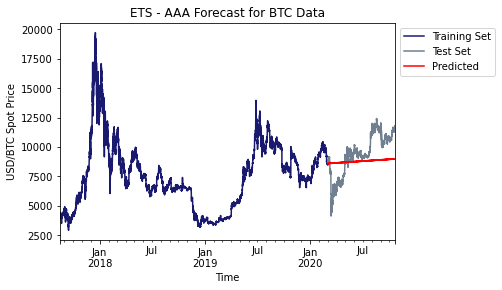

In [206]:
# ETS-AAA Model for BTC - 1
model_ETS('BTC', 1, 'AAA', 24, fitted_set=True)

ETS Type:  AAA
RMSE =  2670.15
MAE =  2462.06
sMAPE =  26.92
CC =  14.6 seconds


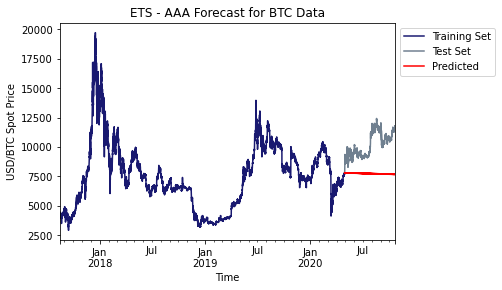

In [207]:
# ETS-AAA Model for BTC - 2
model_ETS('BTC', 2, 'AAA', 24, fitted_set=True)

ETS Type:  AAA
RMSE =  1416.05
MAE =  1165.05
sMAPE =  11.2
CC =  12.69 seconds


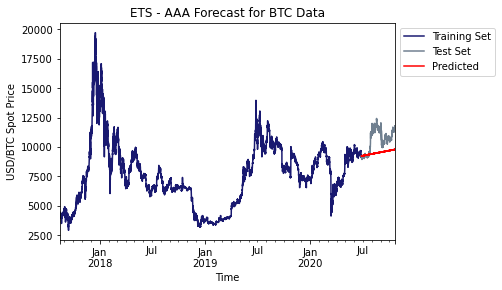

In [208]:
# ETS-AAA Model for BTC - 3
model_ETS('BTC', 3, 'AAA', 24, fitted_set=True)

ETS Type:  AAA
RMSE =  14.72
MAE =  12.03
sMAPE =  146.02
CC =  28.6 seconds


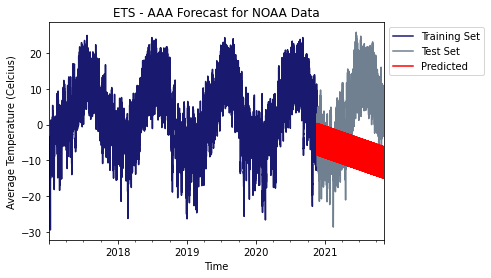

In [209]:
# ETS-AAA Model for NOAA - 1
model_ETS('NOAA', 1, 'AAA', 24, fitted_set=True)

ETS Type:  AAA
RMSE =  22.44
MAE =  20.23
sMAPE =  168.69
CC =  24.09 seconds


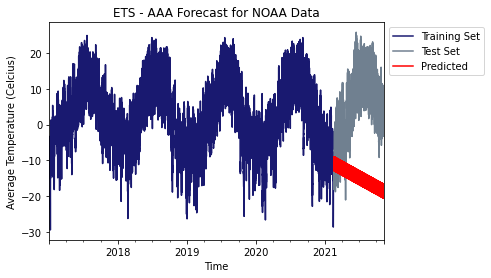

In [210]:
# ETS-AAA Model for NOAA - 2
model_ETS('NOAA', 2, 'AAA', 24, fitted_set=True)

ETS Type:  AAA
RMSE =  7.46
MAE =  6.25
sMAPE =  91.17
CC =  31.27 seconds


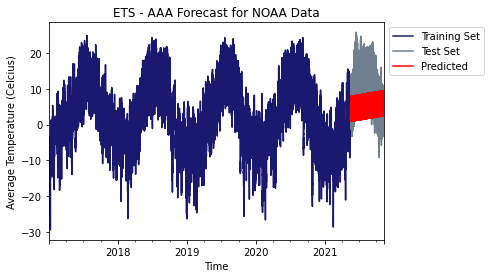

In [211]:
# ETS-AAA Model for NOAA - 3
model_ETS('NOAA', 3, 'AAA', 24, fitted_set=True)

<a class = 'anchor' id = 'section8.4'></a>

### Section 8.4: ETS - AMA
**Holt-Winters Seasonal w/ Multiplicative Trend and 24-period Additive Seasonality**
* [Back to Section](#section8)
* [Back to Top](#TOC)

ETS Type:  AMA
RMSE =  1498.95
MAE =  1191.68
sMAPE =  13.25
CC =  15.18 seconds


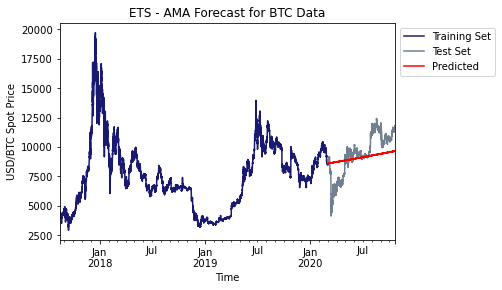

In [212]:
# ETS-AMA Model for BTC - 1
model_ETS('BTC', 1, 'AMA', 24, fitted_set=True)

ETS Type:  AMA
RMSE =  2179.18
MAE =  2004.77
sMAPE =  21.33
CC =  19.1 seconds


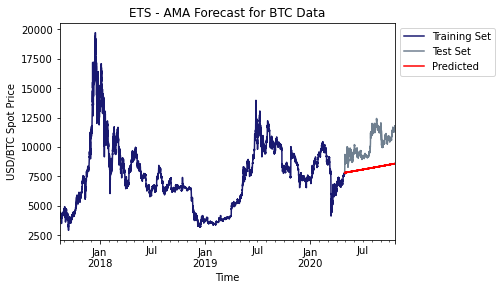

In [213]:
# ETS-AMA Model for BTC - 2
model_ETS('BTC', 2, 'AMA', 24, fitted_set=True)

ETS Type:  AMA
RMSE =  1224.02
MAE =  971.33
sMAPE =  9.23
CC =  15.17 seconds


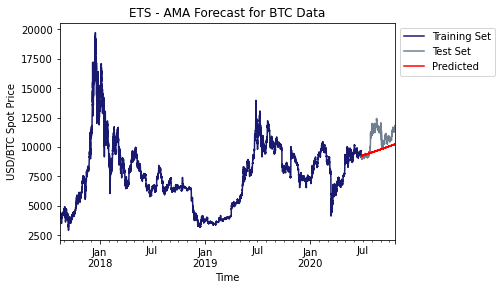

In [214]:
# ETS-AMA Model for BTC - 3
model_ETS('BTC', 3, 'AMA', 24, fitted_set=True)

ETS Type:  AMA
RMSE =  2708.92
MAE =  1565.53
sMAPE =  194.0
CC =  26.79 seconds


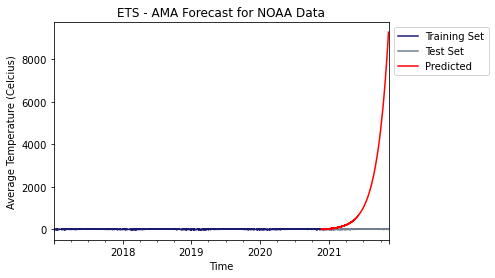

In [215]:
# ETS-AMA Model for NOAA - 1
model_ETS('NOAA', 1, 'AMA', 24, fitted_set=True)

ETS Type:  AMA
RMSE =  219.86
MAE =  150.16
sMAPE =  164.42
CC =  17.88 seconds


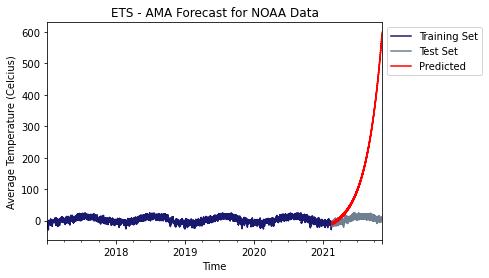

In [216]:
# ETS-AMA Model for NOAA - 2
model_ETS('NOAA', 2, 'AMA', 24, fitted_set=True)

ETS Type:  AMA
RMSE =  29.17
MAE =  28.09
sMAPE =  194.83
CC =  34.07 seconds


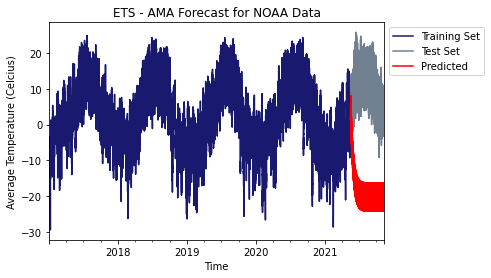

In [217]:
# ETS-AMA Model for NOAA - 3
model_ETS('NOAA', 3, 'AMA', 24, fitted_set=True)

<a class = 'anchor' id = 'section8.5'></a>

### Section 8.5: ETS - AAM
**Holt-Winters Seasonal w/ Additive Trend and 24-period Multiplicative Seasonality**
* [Back to Section](#section8)
* [Back to Top](#TOC)

ETS Type:  AAM
RMSE =  1724.66
MAE =  1447.82
sMAPE =  16.04
CC =  21.56 seconds


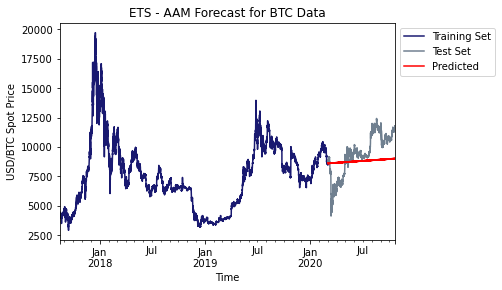

In [218]:
# ETS-AAM Model for BTC - 1
model_ETS('BTC', 1, 'AAM', 24, fitted_set=True)

ETS Type:  AAM
RMSE =  2644.6
MAE =  2435.87
sMAPE =  26.59
CC =  22.23 seconds


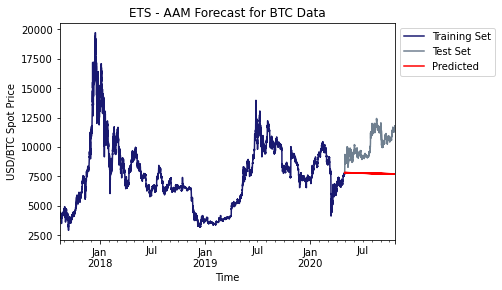

In [219]:
# ETS-AAM Model for BTC - 2
model_ETS('BTC', 2, 'AAM', 24, fitted_set=True)

ETS Type:  AAM
RMSE =  1395.6
MAE =  1148.35
sMAPE =  11.03
CC =  23.13 seconds


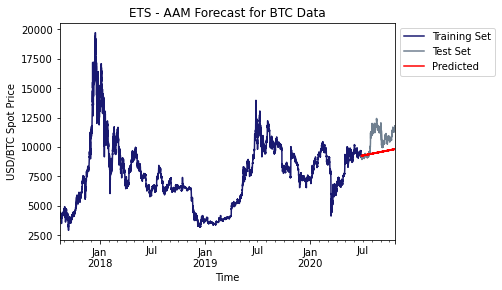

In [220]:
# ETS-AAM Model for BTC - 3
model_ETS('BTC', 3, 'AAM', 24, fitted_set=True)

ETS Type:  AAM
RMSE =  13.35
MAE =  10.88
sMAPE =  144.0
CC =  28.48 seconds


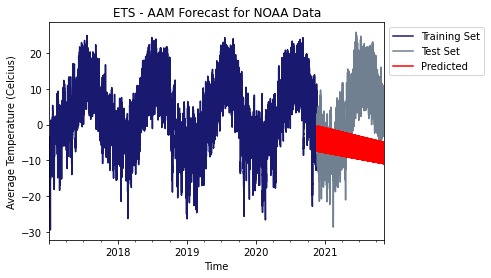

In [221]:
# ETS-AAM Model for NOAA - 1
model_ETS('NOAA', 1, 'AAM', 24, fitted_set=True)

ETS Type:  AAM
RMSE =  21.24
MAE =  19.11
sMAPE =  167.94
CC =  27.17 seconds


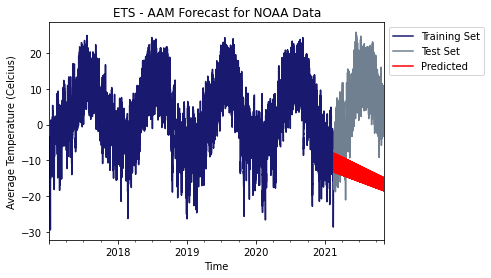

In [222]:
# ETS-AAM Model for NOAA - 2
model_ETS('NOAA', 2, 'AAM', 24, fitted_set=True)

ETS Type:  AAM
RMSE =  7.2
MAE =  6.07
sMAPE =  88.56
CC =  44.81 seconds


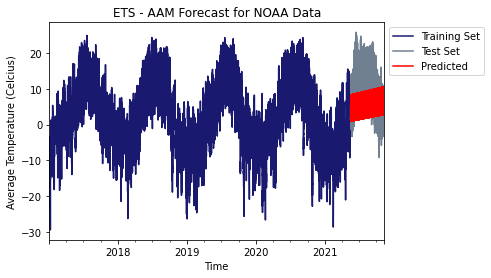

In [223]:
# ETS-AAM Model for NOAA - 3
model_ETS('NOAA', 3, 'AAM', 24, fitted_set=True)

<a class = 'anchor' id = 'section8.6'></a>

### Section 8.6: ETS - AMM
**Holt-Winters Seasonal w/ Multiplicative Trend and 24-period Multiplicative Seasonality**
* [Back to Section](#section8)
* [Back to Top](#TOC)

ETS Type:  AMM
RMSE =  1491.64
MAE =  1181.31
sMAPE =  13.14
CC =  20.69 seconds


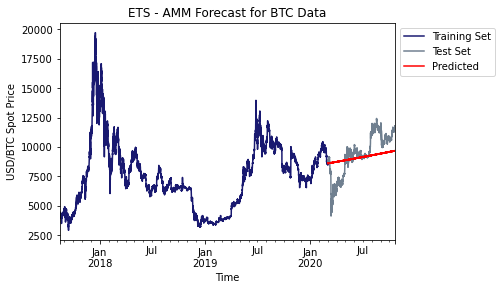

In [224]:
# ETS-AMM Model for BTC - 1
model_ETS('BTC', 1, 'AMM', 24, fitted_set=True)

ETS Type:  AMM
RMSE =  2174.21
MAE =  1999.63
sMAPE =  21.27
CC =  20.07 seconds


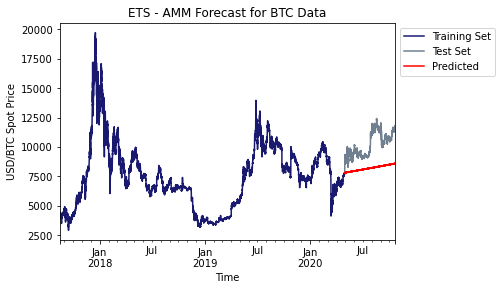

In [225]:
# ETS-AMM Model for BTC - 2
model_ETS('BTC', 2, 'AMM', 24, fitted_set=True)

ETS Type:  AMM
RMSE =  1204.85
MAE =  954.62
sMAPE =  9.07
CC =  25.3 seconds


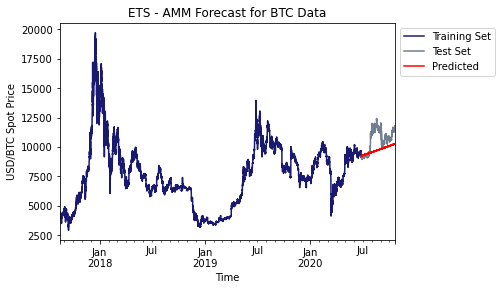

In [226]:
# ETS-AMM Model for BTC - 3
model_ETS('BTC', 3, 'AMM', 24, fitted_set=True)

ETS Type:  AMM
RMSE =  1090.76
MAE =  671.59
sMAPE =  192.06
CC =  17.56 seconds


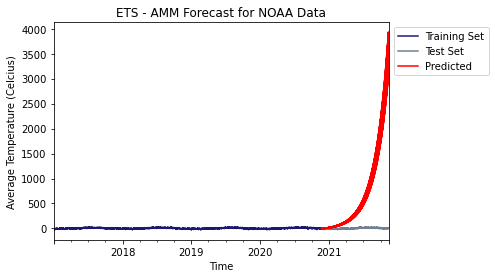

In [227]:
# ETS-AMM Model for NOAA - 1
model_ETS('NOAA', 1, 'AMM', 24, fitted_set=True)

ETS Type:  AMM
RMSE =  1069.38
MAE =  636.88
sMAPE =  178.25
CC =  45.18 seconds


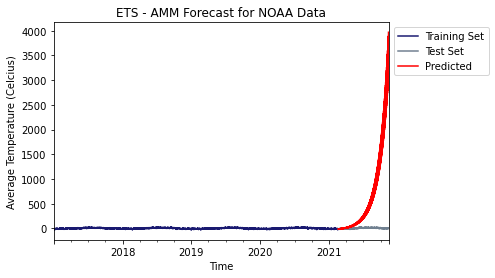

In [228]:
# ETS-AMM Model for NOAA - 2
model_ETS('NOAA', 2, 'AMM', 24, fitted_set=True)

ETS Type:  AMM
RMSE =  472.05
MAE =  318.44
sMAPE =  158.82
CC =  61.97 seconds


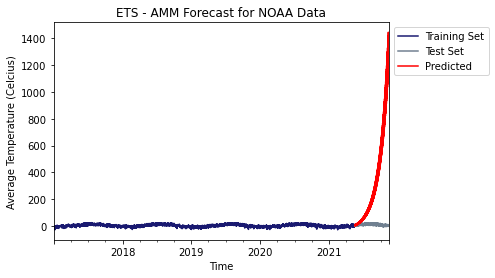

In [229]:
# ETS-AMM Model for NOAA - 3
model_ETS('NOAA', 3, 'AMM', 24, fitted_set=True)

In [125]:
# Check
results_df

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Benchmark,Naive 1,BTC,1,1892.77,1624.37,18.04,0.001585
1,Benchmark,Naive 1,BTC,2,2584.71,2380.67,25.90,0.001910
2,Benchmark,Naive 1,BTC,3,1673.10,1408.91,13.77,0.001684
3,Benchmark,Naive 1,NOAA,1,10.06,8.21,172.67,0.004311
4,Benchmark,Naive 1,NOAA,2,20.11,18.12,168.59,0.001568
5,Benchmark,Naive 1,NOAA,3,10.28,8.53,140.37,0.001483
6,Classical,ARIMA,BTC,1,1496.72,1186.84,13.20,5.340000
7,Classical,ARIMA,BTC,2,2266.42,2086.83,22.31,5.830000
8,Classical,ARIMA,BTC,3,1406.61,1159.11,11.14,5.410000
9,Classical,ARIMA,NOAA,1,9.81,8.02,182.74,5.110000


In [230]:
# Check
df_preds_BTC

,BTC_Benchmark_1,BTC_Benchmark_2,BTC_Benchmark_3,BTC_ARIMA_1,BTC_ARIMA_2,BTC_ARIMA_3,BTC_SARIMA_1,BTC_SARIMA_2,BTC_SARIMA_3,BTC_ETS - AAN_1,...,BTC_ETS - AAA_3,BTC_ETS - AMA_1,BTC_ETS - AMA_2,BTC_ETS - AMA_3,BTC_ETS - AAM_1,BTC_ETS - AAM_2,BTC_ETS - AAM_3,BTC_ETS - AMM_1,BTC_ETS - AMM_2,BTC_ETS - AMM_3
2020-03-02 04:00:00,8601.99,NaN,NaN,8600.205089,NaN,NaN,8599.880529,NaN,NaN,8602.973090,...,NaN,8595.678502,NaN,NaN,8605.868767,NaN,NaN,8605.926098,NaN,NaN
2020-03-02 05:00:00,8601.99,NaN,NaN,8599.260735,NaN,NaN,8618.273184,NaN,NaN,8602.572080,...,NaN,8589.500471,NaN,NaN,8602.897601,NaN,NaN,8603.138161,NaN,NaN
2020-03-02 06:00:00,8601.99,NaN,NaN,8598.798879,NaN,NaN,8567.720570,NaN,NaN,8602.171070,...,NaN,8586.803429,NaN,NaN,8611.635023,NaN,NaN,8612.008105,NaN,NaN
2020-03-02 07:00:00,8601.99,NaN,NaN,8598.613989,NaN,NaN,8588.015443,NaN,NaN,8601.770060,...,NaN,8584.073875,NaN,NaN,8607.716347,NaN,NaN,8608.224755,NaN,NaN
2020-03-02 08:00:00,8601.99,NaN,NaN,8598.588083,NaN,NaN,8586.849052,NaN,NaN,8601.369050,...,NaN,8584.209469,NaN,NaN,8604.340110,NaN,NaN,8604.936744,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19 23:00:00,8601.99,7815.3,9246.83,9645.240124,8412.115230,9790.542741,3243.519060,6616.554561,9104.177374,6372.154605,...,9778.987920,9649.040123,8587.674023,10222.804900,9026.912944,7721.295867,9833.440771,9693.463728,8606.597662,10279.068956
2020-10-20 00:00:00,8601.99,7815.3,9246.83,9645.428456,8412.260645,9790.737170,3268.963712,6598.246826,9119.749255,6371.753595,...,9781.691607,9656.673533,8598.612821,10225.682546,9026.247381,7720.430092,9832.058538,9692.883339,8605.855610,10277.783821
2020-10-20 01:00:00,8601.99,7815.3,9246.83,9645.616789,8412.406061,9790.931600,3302.931472,6595.633020,9107.938867,6371.352585,...,9790.329836,9663.837494,8598.789546,10234.493464,9023.280661,7717.553037,9828.657116,9689.870053,8602.880389,10274.381702
2020-10-20 02:00:00,8601.99,7815.3,9246.83,9645.805121,8412.551476,9791.126029,3342.702820,6613.106200,9106.961622,6370.951575,...,9797.510284,9660.848687,8594.200699,10241.848728,9014.243658,7710.653482,9820.379414,9680.314366,8595.402670,10265.860261


In [231]:
# Check
df_fits_BTC

,BTC_ARIMA_1,BTC_ARIMA_2,BTC_ARIMA_3,BTC_SARIMA_1,BTC_SARIMA_2,BTC_SARIMA_3,BTC_ETS - AAN_1,BTC_ETS - AAN_2,BTC_ETS - AAN_3,BTC_ETS - AMN_1,...,BTC_ETS - AAA_3,BTC_ETS - AMA_1,BTC_ETS - AMA_2,BTC_ETS - AMA_3,BTC_ETS - AAM_1,BTC_ETS - AAM_2,BTC_ETS - AAM_3,BTC_ETS - AMM_1,BTC_ETS - AMM_2,BTC_ETS - AMM_3
2017-08-17 04:00:00,8600.205089,7811.166403,9248.426950,8599.880529,7803.232280,9258.679950,4305.610336,4305.610338,4305.610276,4286.709381,...,4351.320481,4353.606793,4353.170797,4353.594737,4351.320573,4351.320621,4351.320487,4353.610381,4353.596326,4353.605064
2017-08-17 05:00:00,8599.260735,7808.890258,9249.409023,8618.273184,7787.941551,9291.020904,4326.471331,4326.471272,4326.471440,4306.165621,...,4309.277011,4311.789549,4292.337167,4311.753976,4307.126468,4307.387322,4307.759734,4309.638769,4309.840442,4310.242517
2017-08-17 06:00:00,8598.798879,7807.665273,9250.045786,8567.720570,7767.454503,9302.502189,4334.007749,4334.007903,4334.006994,4313.613549,...,4291.507116,4294.009121,4321.483461,4293.995618,4315.743889,4315.620015,4314.984598,4318.247228,4318.097525,4317.501767
2017-08-17 07:00:00,8598.613989,7807.035157,9250.488627,8588.015443,7786.098043,9224.226640,4342.917481,4342.917814,4342.917115,4322.525424,...,4332.373352,4334.843984,4326.022345,4334.846877,4318.343373,4318.577476,4318.692416,4320.844120,4321.040615,4321.193797
2017-08-17 08:00:00,8598.588083,7806.741687,9250.822562,8586.849052,7779.107403,9290.637007,4367.332983,4367.333178,4367.333864,4346.925115,...,4334.829646,4337.306189,4344.556499,4337.301500,4342.574823,4342.938367,4343.199901,4345.040579,4345.421985,4345.721793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-25 23:00:00,NaN,NaN,14120.873455,NaN,NaN,1796.838762,NaN,NaN,9264.874708,NaN,...,9255.135362,NaN,NaN,9255.290086,NaN,NaN,9265.309151,NaN,NaN,9265.459590
2020-06-26 00:00:00,NaN,NaN,14121.067885,NaN,NaN,1811.868868,NaN,NaN,9250.929112,NaN,...,9252.407201,NaN,NaN,9252.556171,NaN,NaN,9249.374290,NaN,NaN,9249.518858
2020-06-26 01:00:00,NaN,NaN,14121.262314,NaN,NaN,1799.516704,NaN,NaN,9280.972371,NaN,...,9289.597456,NaN,NaN,9289.738546,NaN,NaN,9277.295094,NaN,NaN,9277.431509
2020-06-26 02:00:00,NaN,NaN,14121.456743,NaN,NaN,1797.997684,NaN,NaN,9259.134754,NaN,...,9266.679006,NaN,NaN,9266.830957,NaN,NaN,9250.777895,NaN,NaN,9250.895090


In [232]:
# Check
df_preds_NOAA

,NOAA_Benchmark_1,NOAA_Benchmark_2,NOAA_Benchmark_3,NOAA_ARIMA_1,NOAA_ARIMA_2,NOAA_ARIMA_3,NOAA_SARIMA_1,NOAA_SARIMA_2,NOAA_SARIMA_3,NOAA_ETS - AAN_1,...,NOAA_ETS - AAA_3,NOAA_ETS - AMA_1,NOAA_ETS - AMA_2,NOAA_ETS - AMA_3,NOAA_ETS - AAM_1,NOAA_ETS - AAM_2,NOAA_ETS - AAM_3,NOAA_ETS - AMM_1,NOAA_ETS - AMM_2,NOAA_ETS - AMM_3
2020-11-20 21:00:00,-0.8,NaN,NaN,-0.712234,NaN,NaN,-0.453687,NaN,NaN,-0.800420,...,NaN,30.710171,NaN,NaN,30.120187,NaN,NaN,30.134694,NaN,NaN
2020-11-20 22:00:00,-0.8,NaN,NaN,-0.679405,NaN,NaN,-1.299569,NaN,NaN,-0.800821,...,NaN,30.871614,NaN,NaN,29.930693,NaN,NaN,29.955194,NaN,NaN
2020-11-20 23:00:00,-0.8,NaN,NaN,-0.667094,NaN,NaN,-2.309464,NaN,NaN,-0.801221,...,NaN,30.598610,NaN,NaN,29.381856,NaN,NaN,29.416787,NaN,NaN
2020-11-21 00:00:00,-0.8,NaN,NaN,-0.662448,NaN,NaN,-3.735613,NaN,NaN,-0.801621,...,NaN,29.743560,NaN,NaN,28.454046,NaN,NaN,28.500916,NaN,NaN
2020-11-21 01:00:00,-0.8,NaN,NaN,-0.660663,NaN,NaN,-4.461758,NaN,NaN,-0.802022,...,NaN,29.534600,NaN,NaN,28.034819,NaN,NaN,28.102963,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-10 16:00:00,-0.8,-12.9,1.5,0.003684,-14.590786,1.982912,-2333.065752,92.202719,154.016932,-4.209034,...,7.661127,9262.367151,623.067426,12.003759,20.446435,13.264562,38.649501,3215.512599,3391.072858,1386.417083
2021-11-10 17:00:00,-0.8,-12.9,1.5,0.003762,-14.591046,1.983036,-2332.275444,93.416609,153.569757,-4.209434,...,7.964117,9270.274635,624.987269,12.563000,21.716507,14.311381,39.721239,3413.853730,3661.995813,1410.619807
2021-11-10 18:00:00,-0.8,-12.9,1.5,0.003840,-14.591306,1.983160,-2330.950346,94.434542,152.557411,-4.209834,...,8.126268,9278.458236,626.864321,13.034372,23.126078,15.113062,40.450169,3634.316609,3870.619590,1431.078140
2021-11-10 19:00:00,-0.8,-12.9,1.5,0.003918,-14.591566,1.983284,-2330.566595,95.017768,151.906822,-4.210235,...,8.073847,9286.458583,628.146556,13.279091,24.258677,15.447448,40.949987,3811.917966,3959.797775,1445.422656


In [233]:
# Check
df_fits_NOAA

,NOAA_ARIMA_1,NOAA_ARIMA_2,NOAA_ARIMA_3,NOAA_SARIMA_1,NOAA_SARIMA_2,NOAA_SARIMA_3,NOAA_ETS - AAN_1,NOAA_ETS - AAN_2,NOAA_ETS - AAN_3,NOAA_ETS - AMN_1,...,NOAA_ETS - AAA_3,NOAA_ETS - AMA_1,NOAA_ETS - AMA_2,NOAA_ETS - AMA_3,NOAA_ETS - AAM_1,NOAA_ETS - AAM_2,NOAA_ETS - AAM_3,NOAA_ETS - AMM_1,NOAA_ETS - AMM_2,NOAA_ETS - AMM_3
2017-01-01 01:00:00,-0.712234,-12.919580,1.471842,-0.453687,-12.192346,1.668793,-3.452491,-3.452543,-3.452551,26.963884,...,-4.809830,25.488848,24.836469,24.975259,25.177682,25.177269,25.164388,25.043213,25.116643,25.116627
2017-01-01 02:00:00,-0.679405,-12.927095,1.461370,-1.299569,-11.355832,0.178778,-3.499463,-3.499522,-3.499544,26.917371,...,-5.804476,24.723678,27.300114,27.589888,26.301459,26.287473,25.988187,26.737920,26.238591,26.247476
2017-01-01 03:00:00,-0.667094,-12.930080,1.457525,-2.309464,-10.155622,0.472411,-3.899468,-3.899527,-3.899549,26.518599,...,-4.468593,26.152350,26.569412,26.689991,25.810680,25.813930,25.796123,26.429452,25.751811,25.748057
2017-01-01 04:00:00,-0.662448,-12.931363,1.456162,-3.735613,-9.246336,0.847451,-4.499508,-4.499567,-4.499589,25.920405,...,-4.531258,26.067764,25.653827,25.763897,26.284040,26.290286,25.571229,25.685368,26.224716,26.230521
2017-01-01 05:00:00,-0.660663,-12.932008,1.455729,-4.461758,-8.740115,2.154192,-5.199568,-5.199627,-5.199649,25.222499,...,-4.747224,25.926814,24.272757,24.393433,26.182916,26.187814,24.990353,24.470797,26.128176,26.119081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17 04:00:00,NaN,NaN,6.211485,NaN,NaN,2851.892555,NaN,NaN,2.000194,NaN,...,1.238263,NaN,NaN,31.576177,NaN,NaN,31.957802,NaN,NaN,31.656004
2021-05-17 05:00:00,NaN,NaN,6.211609,NaN,NaN,2853.352683,NaN,NaN,1.000144,NaN,...,0.997035,NaN,NaN,31.185175,NaN,NaN,31.108420,NaN,NaN,31.109352
2021-05-17 06:00:00,NaN,NaN,6.211733,NaN,NaN,2858.719543,NaN,NaN,1.300044,NaN,...,1.129064,NaN,NaN,31.391099,NaN,NaN,31.503273,NaN,NaN,31.253409
2021-05-17 07:00:00,NaN,NaN,6.211857,NaN,NaN,2859.938110,NaN,NaN,1.100074,NaN,...,0.907510,NaN,NaN,31.354064,NaN,NaN,31.378568,NaN,NaN,31.208030


In [234]:
# Save results (preds + fits) to a file
df_preds_BTC.to_csv('Preds_BTC_Classical.csv')
df_fits_BTC.to_csv('Fits_BTC_Classical.csv')

df_preds_NOAA.to_csv('Preds_NOAA_Classical.csv')
df_fits_NOAA.to_csv('Fits_NOAA_Classical.csv')

In [317]:
# Save results_df to a file to recall later
# results_df.to_csv('Results_Classical.csv')

In [238]:
pd.read_csv('Fits_NOAA_Classical.csv', index_col= 'Unnamed: 0')

,NOAA_ARIMA_1,NOAA_ARIMA_2,NOAA_ARIMA_3,NOAA_SARIMA_1,NOAA_SARIMA_2,NOAA_SARIMA_3,NOAA_ETS - AAN_1,NOAA_ETS - AAN_2,NOAA_ETS - AAN_3,NOAA_ETS - AMN_1,...,NOAA_ETS - AAA_3,NOAA_ETS - AMA_1,NOAA_ETS - AMA_2,NOAA_ETS - AMA_3,NOAA_ETS - AAM_1,NOAA_ETS - AAM_2,NOAA_ETS - AAM_3,NOAA_ETS - AMM_1,NOAA_ETS - AMM_2,NOAA_ETS - AMM_3
2017-01-01 01:00:00,-0.712234,-12.919580,1.471842,-0.453687,-12.192346,1.668793,-3.452491,-3.452543,-3.452551,26.963884,...,-4.809830,25.488848,24.836469,24.975259,25.177682,25.177269,25.164388,25.043213,25.116643,25.116627
2017-01-01 02:00:00,-0.679405,-12.927095,1.461370,-1.299569,-11.355832,0.178778,-3.499463,-3.499522,-3.499544,26.917371,...,-5.804476,24.723678,27.300114,27.589888,26.301459,26.287473,25.988187,26.737920,26.238591,26.247476
2017-01-01 03:00:00,-0.667094,-12.930080,1.457525,-2.309464,-10.155622,0.472411,-3.899468,-3.899527,-3.899549,26.518599,...,-4.468593,26.152350,26.569412,26.689991,25.810680,25.813930,25.796123,26.429452,25.751811,25.748057
2017-01-01 04:00:00,-0.662448,-12.931363,1.456162,-3.735613,-9.246336,0.847451,-4.499508,-4.499567,-4.499589,25.920405,...,-4.531258,26.067764,25.653827,25.763897,26.284040,26.290286,25.571229,25.685368,26.224716,26.230521
2017-01-01 05:00:00,-0.660663,-12.932008,1.455729,-4.461758,-8.740115,2.154192,-5.199568,-5.199627,-5.199649,25.222499,...,-4.747224,25.926814,24.272757,24.393433,26.182916,26.187814,24.990353,24.470797,26.128176,26.119081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17 04:00:00,NaN,NaN,6.211485,NaN,NaN,2851.892555,NaN,NaN,2.000194,NaN,...,1.238263,NaN,NaN,31.576177,NaN,NaN,31.957802,NaN,NaN,31.656004
2021-05-17 05:00:00,NaN,NaN,6.211609,NaN,NaN,2853.352683,NaN,NaN,1.000144,NaN,...,0.997035,NaN,NaN,31.185175,NaN,NaN,31.108420,NaN,NaN,31.109352
2021-05-17 06:00:00,NaN,NaN,6.211733,NaN,NaN,2858.719543,NaN,NaN,1.300044,NaN,...,1.129064,NaN,NaN,31.391099,NaN,NaN,31.503273,NaN,NaN,31.253409
2021-05-17 07:00:00,NaN,NaN,6.211857,NaN,NaN,2859.938110,NaN,NaN,1.100074,NaN,...,0.907510,NaN,NaN,31.354064,NaN,NaN,31.378568,NaN,NaN,31.208030


# End Section 8
<a class = 'anchor' id = 'section9'></a>

### Model Classes
<img src="ModelTree.PNG" alt="drawing" width="500"/>

# Section 9: SVR Models
* [Back to Top](#TOC)

This section creates the SVR model function and runs it on all of the dataset splits.

In [63]:
# General SVR Function

def model_SVR(dataset, split_num, kernel = 'poly', degree = 2, C = 1.0, fitted_set = False, plot_fits = False):
    '''
    Function that runs the support vector regression (SVR) model on the
    given data.
    
    INPUTS:
    *dataset: BTC or NOAA
    
    *split_num: 1, 2, or 3
    
    *kernel: SVR model class parameter defining which kernel method to use
    
    *degree: SVR model class parameter defining which polynomial degree
    to use for the polynomial kernel, only applicable if kernel = 'poly'
    
    *C: Regularization parameter for SVR model class
    
    *fitted_set: Bool representing if the fitted values should be ran
    for this model, default is False
    
    *plot_fits: Bool representing if the fitted values should be plotted, 
    default is False
    
    OUTPUTS:
    Performance metrics and graphs of predictions. Automatically stores results
    into the results dataframe.
    '''
    
    model_name = 'SVR'
    
    # Retreive datasets, requires integer index
    training_set, test_set, int_training_set, int_test_set = get_data(dataset, split_num, integer=True)
    
    # Define model and fit, recording time
    t = time()
    model = SVR(kernel=kernel, degree = degree, C = C).fit(int_training_set, training_set)
    predictions = model.predict(int_test_set)
    CC = time() - t
    
    # Convert predictions to Pandas series and set index
    predictions = pd.Series(predictions, index = test_set.index)
    
    # Optionally run fitted values
    if fitted_set:
        fitted_values = model.predict(int_training_set)
        fitted_values = pd.Series(fitted_values, index = training_set.index)
    
    # Store results into dataframe
    if fitted_set:
        save_results(dataset, split_num, model_name, predictions, fitted_values)
    else:
        save_results(dataset, split_num, model_name, predictions)
    
    # Plots
    if plot_fits:
        plot_results(training_set, test_set, predictions, model_name, dataset, fitted_values)
    else:
        plot_results(training_set, test_set, predictions, model_name, dataset)
    
    # Metrics
    get_metrics(test_set, predictions, model_name, dataset, split_num, CC)

RMSE =  1406.33
MAE =  1053.3
sMAPE =  11.87
CC =  11.04 seconds


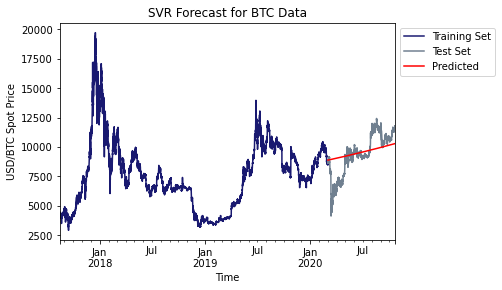

In [64]:
# SVR Model on BTC - 1
model_SVR('BTC', 1, fitted_set=True)

RMSE =  1571.42
MAE =  1318.88
sMAPE =  13.36
CC =  12.52 seconds


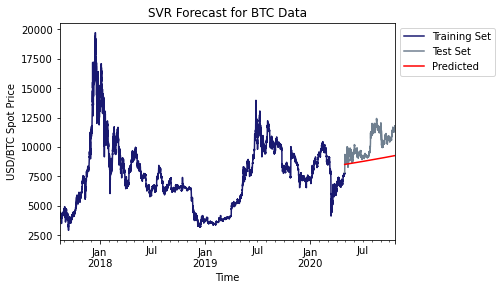

In [65]:
# SVR Model on BTC - 2
model_SVR('BTC', 2, fitted_set=True)

RMSE =  1305.14
MAE =  1070.51
sMAPE =  10.24
CC =  13.39 seconds


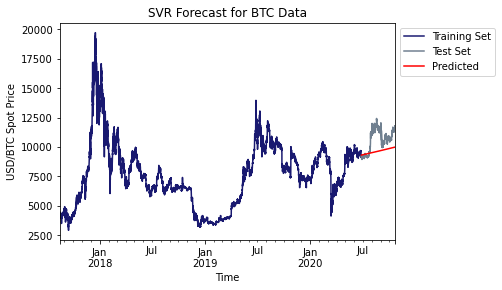

In [66]:
# SVR Model on BTC - 3
model_SVR('BTC', 3, fitted_set=True)

RMSE =  10.06
MAE =  8.39
sMAPE =  124.09
CC =  27.64 seconds


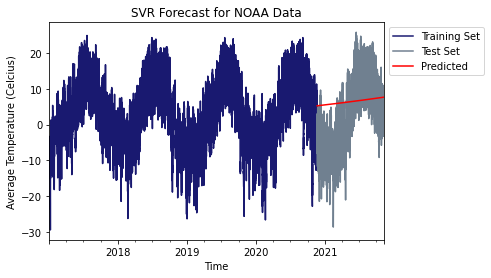

In [67]:
# SVR Model on NOAA - 1
model_SVR('NOAA', 1, fitted_set=True)

RMSE =  10.07
MAE =  8.33
sMAPE =  177.92
CC =  35.94 seconds


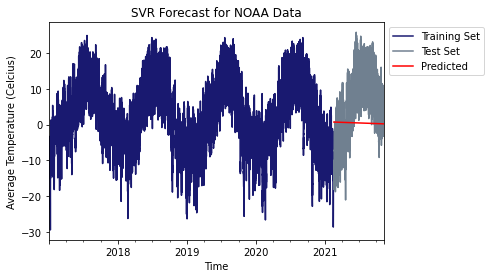

In [68]:
# SVR Model on NOAA - 2
model_SVR('NOAA', 2, fitted_set=True)

RMSE =  12.88
MAE =  11.19
sMAPE =  188.55
CC =  37.67 seconds


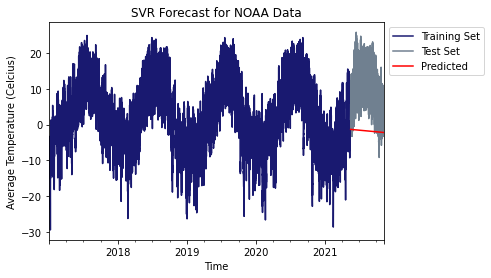

In [69]:
# SVR Model on NOAA - 3
model_SVR('NOAA', 3, fitted_set=True)

In [70]:
# Check
results_df

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Machine Learning,SVR,BTC,1,1406.33,1053.30,11.87,11.04
1,Machine Learning,SVR,BTC,2,1571.42,1318.88,13.36,12.52
2,Machine Learning,SVR,BTC,3,1305.14,1070.51,10.24,13.39
3,Machine Learning,SVR,NOAA,1,10.06,8.39,124.09,27.64
4,Machine Learning,SVR,NOAA,2,10.07,8.33,177.92,35.94
5,Machine Learning,SVR,NOAA,3,12.88,11.19,188.55,37.67


# End Section 9
<a class = 'anchor' id = 'section10'></a>

# Section 10: CART Models
* [Back to Top](#TOC)

This section creates the CART model function and runs it on all of the dataset splits.

In [71]:
# General CART model function

def model_CART(dataset, split_num, fitted_set = False, plot_fits = False, detrend = False, *args):
    '''
    Function that runs the decision tree regressor (CART) model on the
    given data.
    
    INPUTS:
    *dataset: BTC or NOAA
    
    *split_num: 1, 2, or 3
    
    *fitted_set: Bool representing if the fitted values should be ran
    for this model, default is False
    
    *plot_fits: Bool representing if the fitted values should be plotted, 
    default is False
    
    *detrend: Bool representing if detrended data should be used
    instead of the normal data
    
    OUTPUTS:
    Performance metrics and graphs of predictions. Automatically stores results
    into the results dataframe.
    
    *detrend: Bool representing if detrended data should be used
    instead of the normal data
    '''
    
    model_name = 'CART'
    
    # Retreive datasets, requires integer index
    training_set, test_set, int_training_set, int_test_set = get_data(dataset, split_num, integer=True)
    
    # Define model and fit, recording time
    t = time()
    model = DecisionTreeRegressor(max_leaf_nodes=20).fit(int_training_set, training_set)
    predictions = model.predict(int_test_set)
    CC = time() - t
    
    # Convert predictions to Pandas series and set index
    predictions = pd.Series(predictions, index = test_set.index)
    
    # Optionally run fitted values
    if fitted_set:
        fitted_values = model.predict(int_training_set)
        fitted_values = pd.Series(fitted_values, index = training_set.index)
    
    # Store results into dataframe
    if fitted_set:
        save_results(dataset, split_num, model_name, predictions, fitted_values)
    else:
        save_results(dataset, split_num, model_name, predictions)
    
    # Plots
    if plot_fits:
        plot_results(training_set, test_set, predictions, model_name, dataset, fitted_values)
    else:
        plot_results(training_set, test_set, predictions, model_name, dataset)
    
    # Metrics
    get_metrics(test_set, predictions, model_name, dataset, split_num, CC)

RMSE =  1730.79
MAE =  1345.97
sMAPE =  14.89
CC =  0.02 seconds


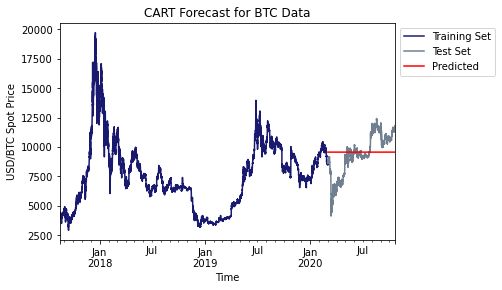

In [72]:
# CART Model for  BTC - 1
model_CART('BTC', 1, fitted_set=True)

RMSE =  3705.71
MAE =  3566.4
sMAPE =  41.83
CC =  0.02 seconds


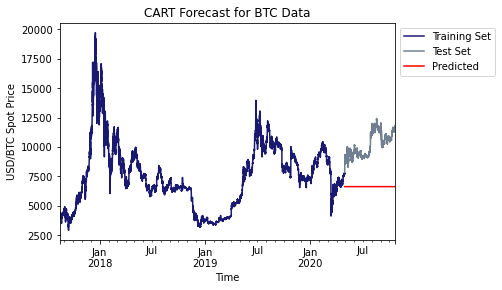

In [73]:
# CART Model for  BTC - 2
model_CART('BTC', 2, fitted_set=True)

RMSE =  1585.67
MAE =  1343.97
sMAPE =  13.08
CC =  0.03 seconds


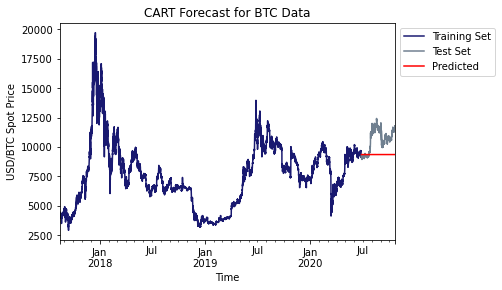

In [74]:
# CART Model for  BTC - 3
model_CART('BTC', 3, fitted_set=True)

RMSE =  10.1
MAE =  8.24
sMAPE =  169.9
CC =  0.03 seconds


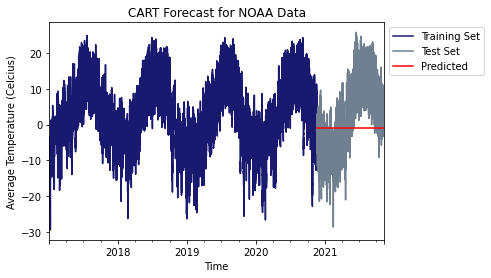

In [75]:
# CART Model for  NOAA - 1
model_CART('NOAA', 1, fitted_set=True)

RMSE =  14.12
MAE =  11.95
sMAPE =  161.29
CC =  0.04 seconds


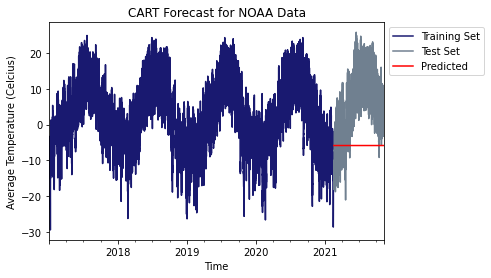

In [76]:
# CART Model for  NOAA - 2
model_CART('NOAA', 2, fitted_set=True)

RMSE =  9.86
MAE =  8.14
sMAPE =  127.57
CC =  0.03 seconds


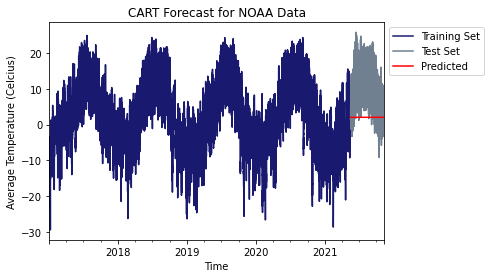

In [77]:
# CART Model for  NOAA - 3
model_CART('NOAA', 3, fitted_set=True)

In [79]:
# Check
results_df

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Machine Learning,SVR,BTC,1,1406.33,1053.30,11.87,11.04
1,Machine Learning,SVR,BTC,2,1571.42,1318.88,13.36,12.52
2,Machine Learning,SVR,BTC,3,1305.14,1070.51,10.24,13.39
3,Machine Learning,SVR,NOAA,1,10.06,8.39,124.09,27.64
4,Machine Learning,SVR,NOAA,2,10.07,8.33,177.92,35.94
5,Machine Learning,SVR,NOAA,3,12.88,11.19,188.55,37.67
6,Machine Learning,CART,BTC,1,1730.79,1345.97,14.89,0.02
7,Machine Learning,CART,BTC,2,3705.71,3566.40,41.83,0.02
8,Machine Learning,CART,BTC,3,1585.67,1343.97,13.08,0.03
9,Machine Learning,CART,NOAA,1,10.10,8.24,169.90,0.03


### Experiments

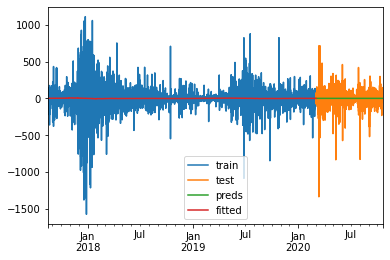

In [231]:
# Testing detrended data for KNN and CART

# Choose which model to test
CART = False
KNN = True

training_set, test_set, int_training_set, int_test_set = get_data('BTC', 1, integer=True)
training_set2 = diff(training_set)
test_set2 = diff(test_set)

K=2000

t = time()
if KNN:
    model = KNeighborsRegressor(n_neighbors=K, p=2, metric='euclidean').fit(int_training_set[1:], training_set2)
elif CART:
    model = DecisionTreeRegressor(max_leaf_nodes=20).fit(int_training_set[1:], training_set2)
predictions = model.predict(int_test_set)
CC = time() - t
fitted_values = model.predict(int_training_set)

# Convert predictions to Pandas series and set index
predictions = pd.Series(predictions, index = test_set.index)
fitted_values = pd.Series(fitted_values, index = training_set.index)

# Plots
training_set2.plot(label = 'train');
test_set2.plot(label = 'test');
predictions.plot(label='preds');
fitted_values.plot(label='fitted');
plt.legend();

RMSE =  1377.73
MAE =  1109.8
sMAPE =  12.42
CC =  2.16 seconds


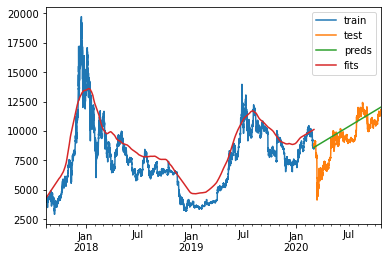

In [232]:
new_fits = undiff(fitted_values[1:], training_set[0], training_set.index)
new_preds = undiff(predictions[:-1], training_set[-1], test_set.index)
training_set.plot(label='train');
test_set.plot(label='test')
new_preds.plot(label='preds');
new_fits.plot(label='fits');
plt.legend();

# Metrics
get_metrics(test_set, new_preds, 'KNN', 'NOAA', 1, CC)

In [ ]:
# UPDATED Conclusions:

# KNN with K = 2000 has excellent performance for trended data.
# KNN also maintains the same excellent model fitness for the 
# detrended model.

# CART loses most of its model fitness but has better performance.
# Graphically, however, this performance is only marginally better
# since its merely a linear forecast vs. the original constant forecast

# End Section 10
<a class = 'anchor' id = 'section11'></a>

# Section 11: KNN Models
* [Back to Top](#TOC)

This section creates the KNN model function and runs it on all of the dataset splits.

In [201]:
# General KNN model function

def model_KNN(dataset, split_num, K, fitted_set = False, plot_fits = False, detrend = False):
    '''
    Function that runs the K-nearest neighbors (KNN) model on the
    given data. Euclidean distance was chosen as the default distance
    metric.
    
    INPUTS:
    *dataset: BTC or NOAA
    
    *split_num: 1, 2, or 3
    
    *K: integer, KNN model class parameter representing the number of 
    neighbors to use in the computation
    
    *fitted_set: Bool representing if the fitted values should be ran
    for this model, default is False
    
    *plot_fits: Bool representing if the fitted values should be plotted, 
    default is False
    
    *detrend: Bool representing if detrended data should be used
    instead of the normal data
    
    OUTPUTS:
    Performance metrics and graphs of predictions. Automatically stores results
    into the results dataframe.
    '''
    
    model_name = 'KNN'
    
    # Retreive datasets, requires integer index
    training_set, test_set, int_training_set, int_test_set = get_data(dataset, split_num, integer=True)
    
    # Optionally use detrended data
    if detrend:
        diff_train = diff(training_set)
        diff_test = diff(test_set)
    
    # Define model and fit, recording time
    t = time()
    if detrend:
        model = KNeighborsRegressor(n_neighbors=K, p=2, metric='euclidean').fit(int_training_set[1:], diff_train)
    else:
        model = KNeighborsRegressor(n_neighbors=K, p=2, metric='euclidean').fit(int_training_set, training_set)
    predictions = model.predict(int_test_set)
    CC = time() - t
    
    # Convert predictions to Pandas series and set index
    # Detrending if necessary
    if detrend:
        predictions = undiff(predictions[:-1], training_set[-1], test_set.index)
    else:
        predictions = pd.Series(predictions, index = test_set.index)
    
    # Optionally run fitted values and convert
    # Detrending if necessary
    if fitted_set:
        fitted_values = model.predict(int_training_set)
        if detrend:
            fitted_values = undiff(fitted_values[1:], training_set[0], training_set.index)
        else:
            fitted_values = pd.Series(fitted_values, index = training_set.index)
    
    # Store results into dataframe
    if fitted_set:
        save_results(dataset, split_num, model_name, predictions, fitted_values)
    else:
        save_results(dataset, split_num, model_name, predictions)
    
    # Plots
    if plot_fits:
        plot_results(training_set, test_set, predictions, model_name, dataset, fitted_values)
    else:
        plot_results(training_set, test_set, predictions, model_name, dataset)
    
    # Metrics
    get_metrics(test_set, predictions, model_name, dataset, split_num, CC)

RMSE =  1377.73
MAE =  1109.8
sMAPE =  12.42
CC =  1.47 seconds


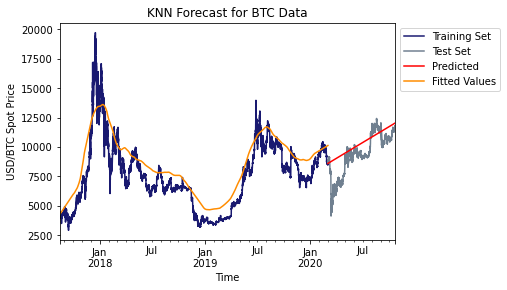

In [210]:
# KNN Model for BTC - 1
model_KNN('BTC', 1, 2000, fitted_set=True, detrend=True, plot_fits=True)

RMSE =  4733.81
MAE =  4301.89
sMAPE =  53.78
CC =  1.3 seconds


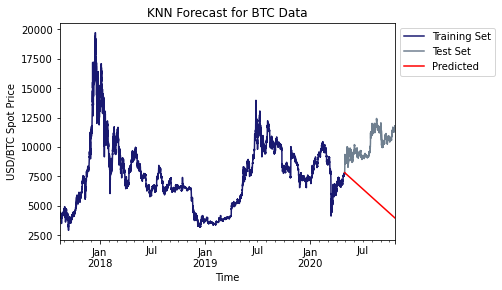

In [82]:
# KNN Model for BTC - 2
model_KNN('BTC', 2, 2000, fitted_set=True, detrend=True)

RMSE =  979.55
MAE =  883.64
sMAPE =  8.03
CC =  1.13 seconds


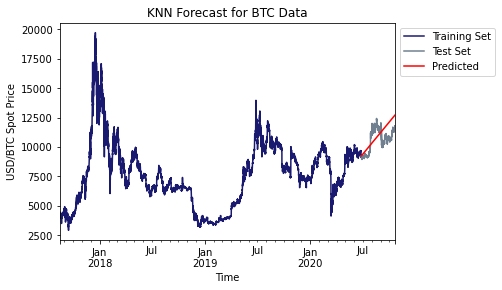

In [83]:
# KNN Model for BTC - 3
model_KNN('BTC', 3, 2000, fitted_set=True, detrend=True)

RMSE =  20.01
MAE =  16.26
sMAPE =  148.66
CC =  2.66 seconds


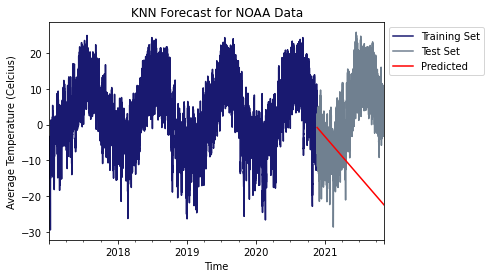

In [84]:
# KNN Model for NOAA - 1
model_KNN('NOAA', 1, 2000, fitted_set=True, detrend=True)

RMSE =  37.55
MAE =  34.22
sMAPE =  175.04
CC =  2.36 seconds


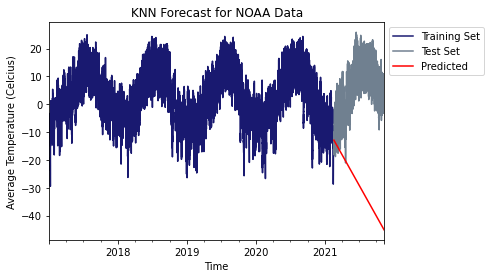

In [85]:
# KNN Model for NOAA - 2
model_KNN('NOAA', 2, 2000, fitted_set=True, detrend=True)

RMSE =  8.7
MAE =  7.19
sMAPE =  95.49
CC =  2.18 seconds


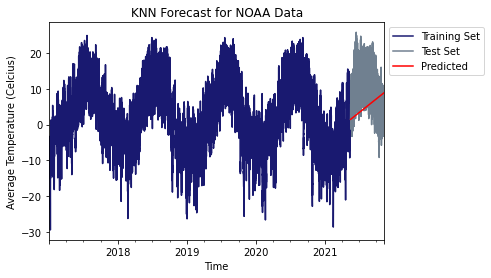

In [86]:
# KNN Model for NOAA - 3
model_KNN('NOAA', 3, 2000, fitted_set=True, detrend=True)

In [87]:
# Check
results_df

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Machine Learning,SVR,BTC,1,1406.33,1053.30,11.87,11.04
1,Machine Learning,SVR,BTC,2,1571.42,1318.88,13.36,12.52
2,Machine Learning,SVR,BTC,3,1305.14,1070.51,10.24,13.39
3,Machine Learning,SVR,NOAA,1,10.06,8.39,124.09,27.64
4,Machine Learning,SVR,NOAA,2,10.07,8.33,177.92,35.94
5,Machine Learning,SVR,NOAA,3,12.88,11.19,188.55,37.67
6,Machine Learning,CART,BTC,1,1730.79,1345.97,14.89,0.02
7,Machine Learning,CART,BTC,2,3705.71,3566.40,41.83,0.02
8,Machine Learning,CART,BTC,3,1585.67,1343.97,13.08,0.03
9,Machine Learning,CART,NOAA,1,10.10,8.24,169.90,0.03


# End Section 11
<a class = 'anchor' id = 'section12'></a>

# Section 12: Gaussian Process Models
* [Back to Top](#TOC)

This section shows some of the experimental code for the Gaussian process model, a model that was originally going to included in the paper. It was removed to due computational constraints (e.g., long run times) and poor forecast results. It is suspected that it was not being implemented correctly. Alternative Python lackages may offer better outputs, such as tensorflow probability and gpytorch.

In [120]:
t = time()
kernel = WhiteKernel()
model = GaussianProcessRegressor(kernel = kernel)
fit = model.fit(closes_int_train_1, scaled_closes_train_1)
pred = fit.predict(closes_int_test_1)
print(time() - t)

# Plots


2192.7724783420563


In [122]:
2193/60

36.55

In [ ]:
#pred = pd.Series(pred.reshape(len(pred)), index=closes_test_1.index)
pred = scaler_BTC_1.inverse_transform(np.array(pred).reshape(-1, 1))

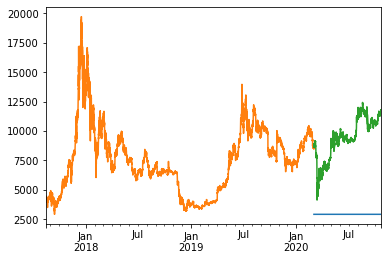

In [135]:
pred = pd.Series(pred.reshape(len(pred)), index = closes_test_1.index)
pred.plot();
closes_train_1.plot();
closes_test_1.plot();

In [ ]:
t = time()
k0 = WhiteKernel()
k1 = ConstantKernel()*ExpSineSquared(periodicity=24, periodicity_bounds=(20, 28))
k2 = ConstantKernel()*RBF()
kernel = k0 + k1 + k2
model = GaussianProcessRegressor(kernel = kernel, normalize_y = True)
fit = model.fit(closes_int_train_1, closes_train_1)
pred = fit.predict(closes_int_test_1)
print(time() - t)

# Plots
pred = pd.Series(pred, index=closes_test_1.index)
pred.plot();
closes_train_1.plot();
closes_test_1.plot();

# This took way too long to run and was forced stopped.

# Run again but without the Constant() kernels and
# use the scaled data.

In [143]:
# Another attempt, simpler kernel, normal data
t = time()
k0 = WhiteKernel()
k1 = ExpSineSquared(periodicity=24, periodicity_bounds=(20, 28))
k2 = RBF()
# kernel = k0 + k1 + k2
kernel = k0 + k2
model = GaussianProcessRegressor(kernel = kernel, normalize_y = True)
fit = model.fit(closes_int_train_1, closes_train_1)
pred = fit.predict(closes_int_test_1)
print(time() - t)

4793.536883831024


In [418]:
print(4794/60, 'minutes')

79.9 minutes


2506.9905553911613

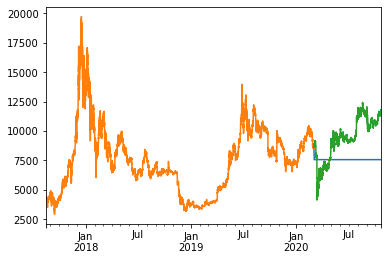

In [155]:
pred_copy = pred.copy()
pred_copy = pd.Series(pred_copy, index = closes_test_1.index)
pred_copy.plot();
closes_train_1.plot();
closes_test_1.plot();
rmse(pred_copy, closes_test_1)

1701.551076412201
28.35948726336161 minutes
RMSE= 2292.802571006795


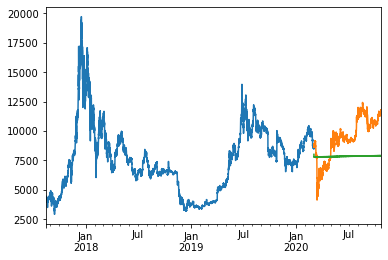

In [420]:
# Another attempt, many kernels, normal data
t = time()
k0 = WhiteKernel()
k1 = ExpSineSquared(periodicity=24, periodicity_bounds=(20, 28))
k2 = RBF()
k3 = DotProduct()
kernel = k0 + k1 + k2 + k3

model = GaussianProcessRegressor(kernel = kernel, normalize_y = True)
fit = model.fit(closes_int_train_1, closes_train_1)
pred = fit.predict(closes_int_test_1)
print(time() - t)
print((time() - t)/60, 'minutes')

# Plots
pred_copy = pred.copy()
pred_copy = pd.Series(pred_copy, index = closes_test_1.index)
closes_train_1.plot();
closes_test_1.plot();
pred_copy.plot();
print('RMSE=', rmse(pred_copy, closes_test_1))

1843.167866230011
30.719766179720562 minutes
RMSE= 2292.802571006795


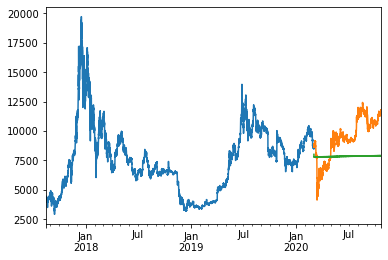

In [483]:
# Attempt to replicate CC of best performing above

# Another attempt, many kernels, normal data
t = time()
k0 = WhiteKernel()
k1 = ExpSineSquared(periodicity=24, periodicity_bounds=(20, 28))
k2 = RBF()
k3 = DotProduct()
kernel = k0 + k1 + k2 + k3

model = GaussianProcessRegressor(kernel = kernel, normalize_y = True)
fit = model.fit(closes_int_train_1, closes_train_1)
pred = fit.predict(closes_int_test_1)
print(time() - t)
print((time() - t)/60, 'minutes')

# Plots
pred_copy = pred.copy()
pred_copy = pd.Series(pred_copy, index = closes_test_1.index)
closes_train_1.plot();
closes_test_1.plot();
pred_copy.plot();
print('RMSE=', rmse(pred_copy, closes_test_1))

In [ ]:
# It worked! 30 min run time. If this is replicable, then its manageable!
# Need to set and save seeds

In [ ]:
# Need to test:

# 1) Using detrended data!

# 2) Using MY descaled data, instead of or in addition to the normalize_y

In [ ]:
# Notes: 

# alpha changed to 0.0001 instead of default increased the run time by a 
# factor of 15 but without changing the accuracy

# Keep defualt alpha, and normalize_y = True

# Adjusting RBF param to 3 maxed out the RAM and froze the computer

# Keep all kernel at default settings

# End Section 12
<a class = 'anchor' id = 'section13'></a>

# Section 13: MLP Models
* [Back to Top](#TOC)

This section creates the accuracy function used to track training accuracy for the neural network models.

It also creates a general neural network model function that can run the MLP, RNN, LSTM, or GRU neural network models. The MLP version of this function is run on all of the dataset splits.

In [62]:
def ABS(y_true, y_pred, tol = 0.05):
    '''
    Function that creates a custom accuracy metric for use in the NN models.
    
    Computes the percentage of predicted values that are within a certian
    tolerance level of the actual values.
    
    INPUTS:
    *y_true: 1D array of true values
    
    *y_pred: 1D array of predicted values
    
    *tol: float representing the error tolerance as a decimal percent 
    (e.g., 0.0 <= tol <= 1.0)
    
    OUTPUTS:
    Float representing accuracy as a percentage.
    '''

    tol_array = tol*np.ones(y_true.shape[0])
    test_array = keras.backend.abs(y_true - y_pred)/keras.backend.abs(y_true)

    test_array = keras.backend.less(test_array, tol_array)
    test_array = tf.where(test_array, 1, 0)
    test_sum = np.float(keras.backend.sum(test_array, axis=0))
    
    test_count = np.float(len(test_array))
    
    return test_sum/test_count

In [326]:
# General Neural Network Function

def model_NN(dataset, split_num, NN_type, n_inputs = 48, n_layers = 1, n_cells = 50, n_epochs = 20, n_features = 1, opt = 'adam', regularize = False):
    '''
    Function that runs a neural network model on the given dataset. It is built generally
    enough to handle MLP, RNN, LSTM, or GRU neural networks by instantiating the same
    Sequential model class from keras. 
    
    The function builds and compiles the correct model according to the inputs, fits it to 
    the given dataset, and iteratively generates predictions. It reformats the dataset into
    batches using the TimeSeriesGenerator preprocessing function from keras.
    
    This model also uses the custom accuracy metric, ABS, defined above, which is used
    during model traing and is stored in the model history dictionary.
    
    INPUTS:
    *dataset: BTC or NOAA
    
    *split_num: 1, 2, or 3
    
    *NN_type: string representing which to implement, must be in the set: MLP, RNN, LSTM, GRU
    
    *n_inputs: integer representing the length of each batch size, 
    default is 48 (hours, 2 days)
    
    *n_layers: integer reprenting how many hidden layers to build for the deep learning
    models (RNN, LSTM, or GRU). The MLP model ignores this parameter, it builds 1 hidden 
    layer. Default is 1 layers.
    
    *n_cells: integer representing the number of cells for each hidden layer, 
    default is 50 cells.
    
    *n_epochs: integer representing the number of epochs to train each model for, default
    is 20 epochs. 
    
    *n_features: integer representing the number of variables in the dataset, 
    i.e., univariate tiem series has 1 feature, multivariate will have more. 
    Default is 1.
    
    *opt: string or class from tf.keras.optimizers representing which optimizer to run
    for the backpropagation algorithm during model training. Default is the ADAM
    optimizer, but many of the optimizers given were from the tf.keras.optmizers set.
    
    *regularize: Bool representing if the MLP model should be regularized. This was only
    used during model testing and was not included in any of the final models. 
    
    OUTPUTS:
    *model: the model object created by the keras.Sequential class. 
    Useful for calling later to retrieve metrics or history.
    
    my_history: Pandas dataframe containing the history object of the keras.Sequential 
    class that records metrics during model training. Also tracks any custom metrics 
    passing into the model when it is compiled (e.g., ABS).
    
    Performance metrics and graphs of predictions. Automatically stores results
    into the results dataframe.
    
    '''
    model_name = NN_type
    
    # Retreive datasets, requires scaled data
    training_set, test_set, scaled_training_set, scaled_test_set = get_data(dataset, split_num, scaled=True)
    
    # Construct generator
    gen = TimeseriesGenerator(scaled_training_set, scaled_training_set,
                             length=n_inputs, batch_size=1)
    
    # Define regularizer as L1
    reg = keras.regularizers.l2()
    
    # Define optimizer
    if opt == 'adam':
        opt = tf.keras.optimizers.Adam(lr = 0.0005, clipnorm = 0.5)
    elif opt == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=0.001, nesterov=True, momentum=0.9, clipvalue = 0.7)
    elif opt == 'adamax':
        opt = tf.keras.optimizers.Adamax(clipnorm = 1.0)
    
    ## Define model
    
    # Instantiate model 
    model = Sequential()
    
    # Input layer
    model.add(Input((n_inputs, n_features)))
    
    # Build NN model based on input
    if model_name == 'MLP':
        
        
        # Single layer by default
        # Regularize or not
        if regularize:
            print('Regularizer activated!') # check
            model.add(Dense(n_cells,
                           kernel_initializer = 'he_normal',
                           kernel_regularizer = reg))
        else:
            model.add(Dense(n_cells))
            
    elif model_name == 'RNN':
        
        # Add layers
        for i in range(n_layers-1):
            model.add(SimpleRNN(n_cells, 
                                kernel_initializer = 'he_normal',
                                return_sequences = True))
            
        # Second-to-last layer
        model.add(SimpleRNN(n_cells,  
                            kernel_initializer = 'he_normal'))
            
    elif model_name == 'LSTM':
        
        # Add layers
        for i in range(n_layers-1):
            model.add(LSTM(n_cells,  
                            kernel_initializer = 'he_normal', 
                            return_sequences = True))
            
        # Second-to-last layer
        model.add(LSTM(n_cells, 
                       kernel_initializer = 'he_normal'))
            
    elif model_name == 'GRU':
        
        # Add layers
        for i in range(n_layers-1):
            model.add(GRU(n_cells, 
                          kernel_initializer = 'he_normal',
                          return_sequences = True))
            
        # Second-to-last layer
        model.add(GRU(n_cells, 
                      kernel_initializer = 'he_normal'))
            
    # Incorrect NN type
    else:
        raise NameError('Not a valid neural network name')
        
    # Output layer
    model.add(Dense(1))
    
    # Compile model
    model.compile(optimizer = opt, loss = 'mse', metrics = [ABS])
    
    # Fitting model
    t = time()
    model.fit(gen, epochs = n_epochs, verbose = 0)
    print('Train time: ', np.round((time() - t)/60, 2), 'minutes\n')
    
    # Save model history
    my_history = pd.DataFrame(model.history.history)
    my_history.columns = ['Loss', 'Accuracy']
    
    ## Forming predictions
    test_preds = []
    first_eval_batch = scaled_training_set[-n_inputs:]
    current_batch = first_eval_batch.reshape((1, n_inputs, n_features))
    
    # Iteratively computing one-step ahead predictions
    # Output shape is different for different models
    if model_name == 'MLP':
        for i in range(len(test_set)):
            current_pred = model.predict(current_batch)[0][0]
            test_preds.append(current_pred)
            current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)
    
    elif model_name in ['RNN', 'LSTM', 'GRU']:
        for i in range(len(test_set)):
            current_pred = model.predict(current_batch)[0][0]
            test_preds.append(current_pred)
            current_batch = np.append(current_batch[:, 1:, :], [[[current_pred]]], axis = 1)
    CC = time() - t    
    
    # Converting and descaling predictions
    scaler = get_scaler(dataset, split_num)
    test_preds = np.array(test_preds).reshape(len(test_preds), 1)
    print(test_preds.shape)
    true_pred = scaler.inverse_transform(test_preds)
    
    # Convert predictions to Pandas series and set index
    predictions = pd.Series(true_pred.flatten(), index = test_set.index)
    
    # Store results into dataframe
    save_results(dataset, split_num, model_name, predictions)
    
    # Plots
    plot_results(training_set, test_set, predictions, model_name, dataset)
    
    # Metrics
    get_metrics(test_set, predictions, model_name, dataset, split_num, CC)
    print('Total run time:', np.round(CC/60, 2), 'minutes')
    
    return model, my_history

In [90]:
# DECISION: Seed # 24 for MLP - BTC
# DECISION: Seed # 7 for MLP - NOAA

Train time:  3.14 minutes

RMSE =  1305.04
MAE =  1002.14
sMAPE =  11.41
CC =  337.18 seconds
Total run time: 5.62 minutes


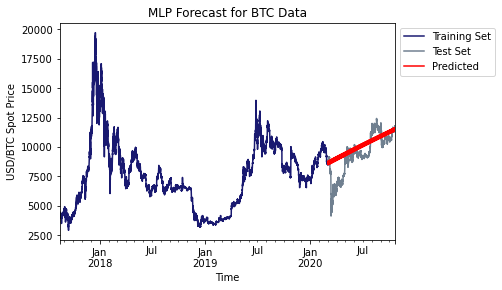

In [91]:
# MLP for BTC - 1
seed = 24
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_MLP, my_history = model_NN('BTC', 1, 'MLP', n_cells = 50, n_epochs = 20)

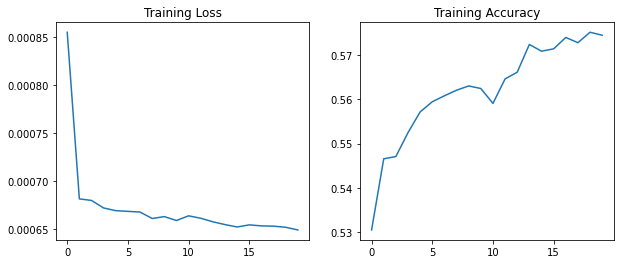

In [92]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot();
plt.title('Training Loss')

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot()
plt.title('Training Accuracy');
# plt.close();

Train time:  3.26 minutes

RMSE =  993.8
MAE =  860.04
sMAPE =  8.3
CC =  307.75 seconds
Total run time: 5.13 minutes


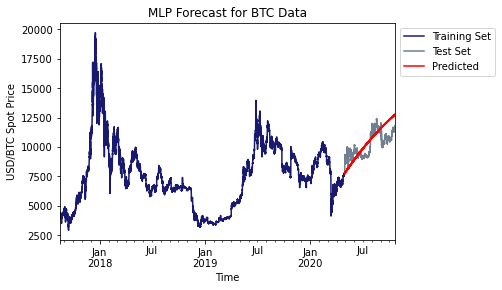

In [93]:
# MLP for BTC - 2
seed = 24
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_MLP, my_history = model_NN('BTC', 2, 'MLP', n_cells = 50, n_epochs = 20)

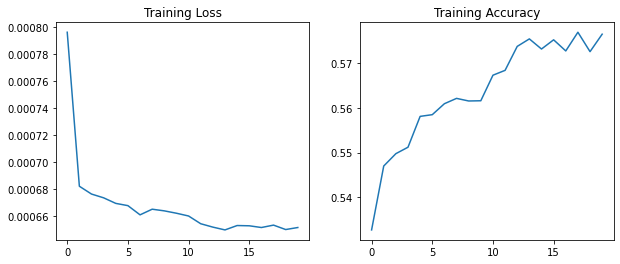

In [94]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot();
plt.title('Training Loss')

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot()
plt.title('Training Accuracy');
# plt.close();

Train time:  3.46 minutes

RMSE =  3385.56
MAE =  2834.7
sMAPE =  22.43
CC =  283.37 seconds
Total run time: 4.72 minutes


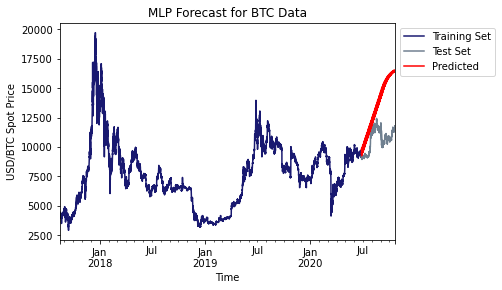

In [95]:
# MLP for BTC - 3
seed = 24
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_MLP, my_history = model_NN('BTC', 3, 'MLP', n_cells = 50, n_epochs = 20)

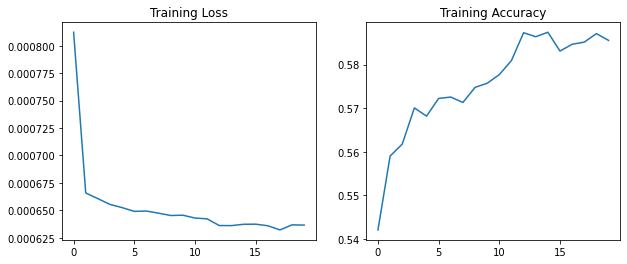

In [96]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot();
plt.title('Training Loss')

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot()
plt.title('Training Accuracy');
# plt.close();

Train time:  4.66 minutes

RMSE =  9.68
MAE =  8.1
sMAPE =  132.69
CC =  548.5 seconds
Total run time: 9.14 minutes


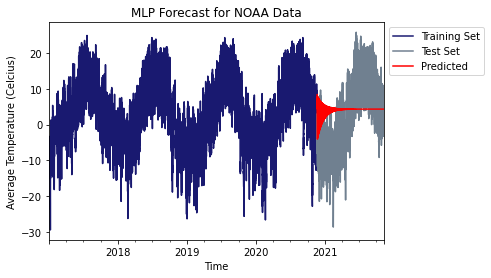

In [97]:
# MLP for NOAA - 1
seed = 7
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_MLP, my_history = model_NN('NOAA', 1, 'MLP', n_cells = 50, n_epochs = 20)

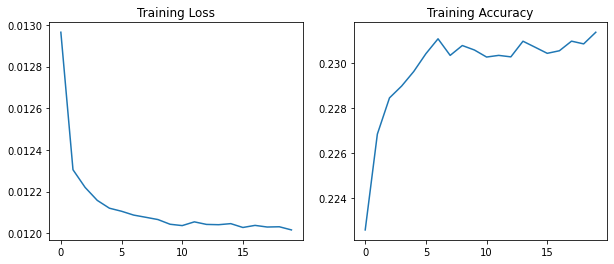

In [98]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot();
plt.title('Training Loss')

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot()
plt.title('Training Accuracy');
# plt.close();

Train time:  6.08 minutes

RMSE =  9.06
MAE =  7.34
sMAPE =  94.86
CC =  559.34 seconds
Total run time: 9.32 minutes


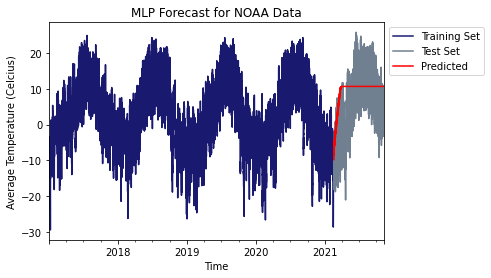

In [99]:
# MLP for NOAA - 2
seed = 7
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_MLP, my_history = model_NN('NOAA', 2, 'MLP', n_cells = 50, n_epochs = 20)

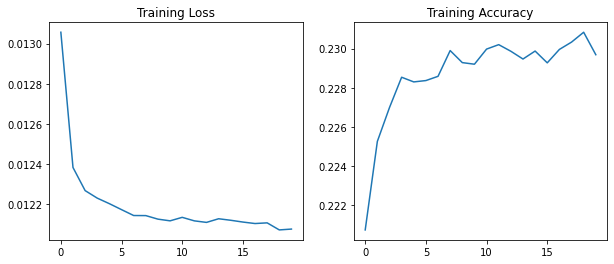

In [100]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot();
plt.title('Training Loss')

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot()
plt.title('Training Accuracy');
# plt.close();

Train time:  5.89 minutes

RMSE =  6.78
MAE =  5.56
sMAPE =  65.09
CC =  466.1 seconds
Total run time: 7.77 minutes


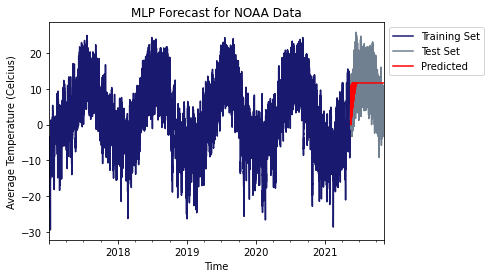

In [101]:
# MLP for NOAA - 3
seed = 7
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_MLP, my_history = model_NN('NOAA', 3, 'MLP', n_cells = 50, n_epochs = 20)

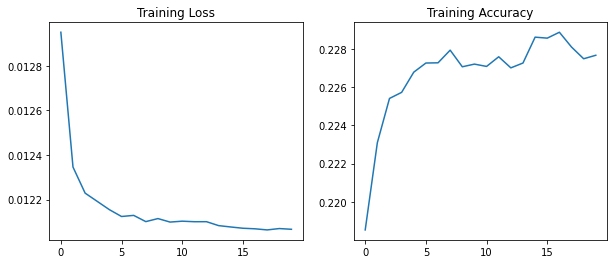

In [102]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot();
plt.title('Training Loss')

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot()
plt.title('Training Accuracy');
# plt.close();

In [103]:
# Check
results_df

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Machine Learning,SVR,BTC,1,1406.33,1053.30,11.87,11.04
1,Machine Learning,SVR,BTC,2,1571.42,1318.88,13.36,12.52
2,Machine Learning,SVR,BTC,3,1305.14,1070.51,10.24,13.39
3,Machine Learning,SVR,NOAA,1,10.06,8.39,124.09,27.64
4,Machine Learning,SVR,NOAA,2,10.07,8.33,177.92,35.94
5,Machine Learning,SVR,NOAA,3,12.88,11.19,188.55,37.67
6,Machine Learning,CART,BTC,1,1730.79,1345.97,14.89,0.02
7,Machine Learning,CART,BTC,2,3705.71,3566.40,41.83,0.02
8,Machine Learning,CART,BTC,3,1585.67,1343.97,13.08,0.03
9,Machine Learning,CART,NOAA,1,10.10,8.24,169.90,0.03


In [104]:
# Check
df_preds_BTC

,BTC_SVR_1,BTC_SVR_2,BTC_SVR_3,BTC_CART_1,BTC_CART_2,BTC_CART_3,BTC_KNN_1,BTC_KNN_2,BTC_KNN_3,BTC_MLP_1,BTC_MLP_2,BTC_MLP_3
2020-03-02 04:00:00,8880.495112,NaN,NaN,9560.936792,NaN,NaN,8601.990000,NaN,NaN,8767.792969,NaN,NaN
2020-03-02 05:00:00,8880.718889,NaN,NaN,9560.936792,NaN,NaN,8602.603845,NaN,NaN,8793.978516,NaN,NaN
2020-03-02 06:00:00,8880.942676,NaN,NaN,9560.936792,NaN,NaN,8603.217690,NaN,NaN,8734.813477,NaN,NaN
2020-03-02 07:00:00,8881.166472,NaN,NaN,9560.936792,NaN,NaN,8603.831535,NaN,NaN,8771.808594,NaN,NaN
2020-03-02 08:00:00,8881.390279,NaN,NaN,9560.936792,NaN,NaN,8604.445380,NaN,NaN,8775.025391,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19 23:00:00,10280.802556,9264.167077,9982.794234,9560.936792,6629.577626,9354.566529,12016.809735,3976.541005,12690.95586,11414.073242,12734.968750,16450.871094
2020-10-20 00:00:00,10281.082225,9264.361231,9983.049194,9560.936792,6629.577626,9354.566529,12017.423580,3975.620660,12692.19520,11437.565430,12730.810547,16458.775391
2020-10-20 01:00:00,10281.361905,9264.555392,9983.304163,9560.936792,6629.577626,9354.566529,12018.037425,3974.700315,12693.43454,11439.684570,12747.163086,16452.660156
2020-10-20 02:00:00,10281.641594,9264.749559,9983.559141,9560.936792,6629.577626,9354.566529,12018.651270,3973.779970,12694.67388,11498.634766,12761.436523,16454.023438


In [105]:
# Check
df_preds_NOAA

,NOAA_SVR_1,NOAA_SVR_2,NOAA_SVR_3,NOAA_CART_1,NOAA_CART_2,NOAA_CART_3,NOAA_KNN_1,NOAA_KNN_2,NOAA_KNN_3,NOAA_MLP_1,NOAA_MLP_2,NOAA_MLP_3
2020-11-20 21:00:00,5.288108,NaN,NaN,-0.941667,NaN,NaN,-0.80000,NaN,NaN,8.404056,NaN,NaN
2020-11-20 22:00:00,5.288361,NaN,NaN,-0.941667,NaN,NaN,-0.80255,NaN,NaN,8.026891,NaN,NaN
2020-11-20 23:00:00,5.288613,NaN,NaN,-0.941667,NaN,NaN,-0.80510,NaN,NaN,7.690813,NaN,NaN
2020-11-21 00:00:00,5.288866,NaN,NaN,-0.941667,NaN,NaN,-0.80765,NaN,NaN,7.126251,NaN,NaN
2020-11-21 01:00:00,5.289118,NaN,NaN,-0.941667,NaN,NaN,-0.81020,NaN,NaN,7.220345,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-10 16:00:00,7.706515,0.225115,-2.204298,-0.941667,-5.848476,2.062637,-22.51325,-45.14425,8.94625,4.358094,10.720463,11.686585
2021-11-10 17:00:00,7.706831,0.225029,-2.204515,-0.941667,-5.848476,2.062637,-22.51580,-45.14930,8.94800,4.358094,10.720463,11.686585
2021-11-10 18:00:00,7.707147,0.224944,-2.204733,-0.941667,-5.848476,2.062637,-22.51835,-45.15435,8.94975,4.358098,10.720463,11.686585
2021-11-10 19:00:00,7.707462,0.224858,-2.204950,-0.941667,-5.848476,2.062637,-22.52090,-45.15940,8.95150,4.358107,10.720463,11.686585


In [106]:
# Check
df_fits_BTC

,BTC_SVR_1,BTC_SVR_2,BTC_SVR_3,BTC_CART_1,BTC_CART_2,BTC_CART_3,BTC_KNN_1,BTC_KNN_2,BTC_KNN_3
2017-08-17 04:00:00,6388.573528,6562.078920,6434.454226,4200.640958,4200.640958,4200.640958,4308.830000,4308.830000,4308.830000
2017-08-17 05:00:00,6388.573533,6562.078923,6434.454230,4200.640958,4200.640958,4200.640958,4310.375585,4310.375585,4310.375585
2017-08-17 06:00:00,6388.573548,6562.078934,6434.454244,4200.640958,4200.640958,4200.640958,4311.921170,4311.921170,4311.921170
2017-08-17 07:00:00,6388.573573,6562.078951,6434.454267,4200.640958,4200.640958,4200.640958,4313.466755,4313.466755,4313.466755
2017-08-17 08:00:00,6388.573608,6562.078976,6434.454299,4200.640958,4200.640958,4200.640958,4315.012340,4315.012340,4315.012340
...,...,...,...,...,...,...,...,...,...
2020-06-25 23:00:00,NaN,NaN,9308.494904,NaN,NaN,9354.566529,NaN,NaN,10926.397220
2020-06-26 00:00:00,NaN,NaN,9308.724364,NaN,NaN,9354.566529,NaN,NaN,10927.636560
2020-06-26 01:00:00,NaN,NaN,9308.953833,NaN,NaN,9354.566529,NaN,NaN,10928.875900
2020-06-26 02:00:00,NaN,NaN,9309.183311,NaN,NaN,9354.566529,NaN,NaN,10930.115240


In [107]:
# Check
df_fits_NOAA

,NOAA_SVR_1,NOAA_SVR_2,NOAA_SVR_3,NOAA_CART_1,NOAA_CART_2,NOAA_CART_3,NOAA_KNN_1,NOAA_KNN_2,NOAA_KNN_3
2017-01-01 01:00:00,0.986473,2.047041,2.422953,-5.51225,-5.51225,-5.512250,-3.50000,-3.50000,-3.50000
2017-01-01 02:00:00,0.986473,2.047041,2.422953,-5.51225,-5.51225,-5.512250,-3.49785,-3.49785,-3.49785
2017-01-01 03:00:00,0.986473,2.047041,2.422953,-5.51225,-5.51225,-5.512250,-3.49570,-3.49570,-3.49570
2017-01-01 04:00:00,0.986473,2.047041,2.422953,-5.51225,-5.51225,-5.512250,-3.49355,-3.49355,-3.49355
2017-01-01 05:00:00,0.986473,2.047041,2.422953,-5.51225,-5.51225,-5.512250,-3.49140,-3.49140,-3.49140
...,...,...,...,...,...,...,...,...,...
2021-05-17 04:00:00,NaN,NaN,-1.324944,NaN,NaN,2.062637,NaN,NaN,1.51130
2021-05-17 05:00:00,NaN,NaN,-1.325140,NaN,NaN,2.062637,NaN,NaN,1.51305
2021-05-17 06:00:00,NaN,NaN,-1.325336,NaN,NaN,2.062637,NaN,NaN,1.51480
2021-05-17 07:00:00,NaN,NaN,-1.325531,NaN,NaN,2.062637,NaN,NaN,1.51655


In [108]:
# Save results and preds/fits to file

results_df.to_csv('Results_ML.csv')

df_preds_BTC.to_csv('Preds_BTC_ML.csv')
df_fits_BTC.to_csv('Fits_BTC_ML.csv')

df_preds_NOAA.to_csv('Preds_NOAA_ML.csv')
df_fits_NOAA.to_csv('Fits_NOAA_ML.csv')

# End Section 13
<a class = 'anchor' id = 'section14'></a>

# Section 14: RNN Models
* [Back to Top](#TOC)

This section runs the RNN model using the neural network model function from the MLP section.

Due to computational constraints, it is only run on the primary dataset split.


Seed: 7
Train time:  112.48 minutes

RMSE =  1719.28
MAE =  1329.74
sMAPE =  14.72
CC =  6951.04 seconds
Total run time: 115.85 minutes


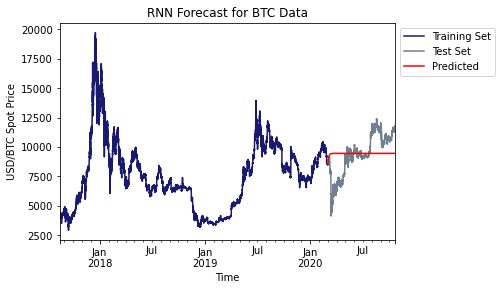

In [64]:
# RNN for BTC - 1

# AdaMax with low lr
opt = tf.keras.optimizers.Adamax(learning_rate=0.0001, clipnorm = 1.0)

seed = 7
print('\nSeed:', seed)
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_RNN_BTC, my_history = model_NN('BTC', 1, 'RNN', n_cells = 50, n_layers = 3, n_epochs = 20, opt = opt)

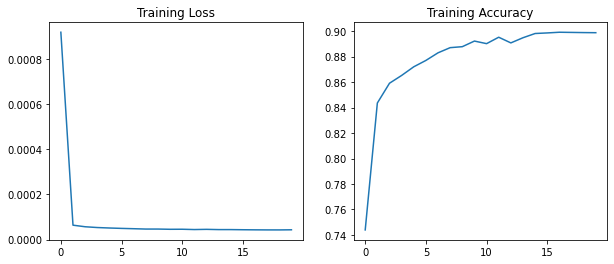

In [65]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot();
plt.title('Training Loss')

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot()
plt.title('Training Accuracy');
# plt.close();


Seed: 2
Train time:  174.18 minutes

RMSE =  30.54
MAE =  22.52
sMAPE =  153.47
CC =  10758.15 seconds
Total run time: 179.3 minutes


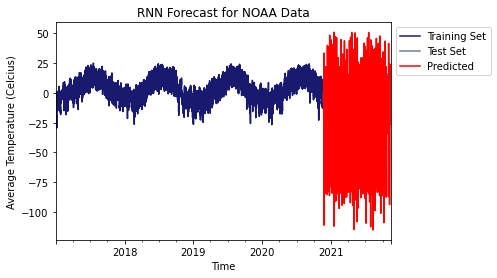

In [66]:
# RNN for NOAA - 1

# AdaMax with low lr
opt = tf.keras.optimizers.Adamax(learning_rate=0.0001, clipnorm = 1.0)

seed = 2
print('\nSeed:', seed)
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_RNN_NOAA, my_history = model_NN('NOAA', 1, 'RNN', n_cells = 50, n_layers = 3, n_epochs = 20, opt = opt)

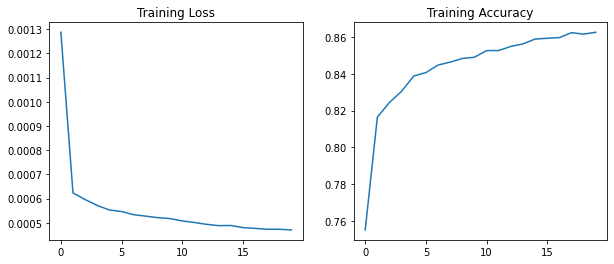

In [67]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot();
plt.title('Training Loss')

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot()
plt.title('Training Accuracy');
# plt.close();

# End Section 14
<a class = 'anchor' id = 'section15'></a>

# Section 15: LSTM Models
* [Back to Top](#TOC)

This section runs the LSTM model using the neural network model function from the MLP section.

Due to computational constraints, it is only run on the primary dataset split.


Seed: 3
Train time:  226.29 minutes

RMSE =  4481.38
MAE =  4120.16
sMAPE =  54.1
CC =  13784.16 seconds
Total run time: 229.74 minutes


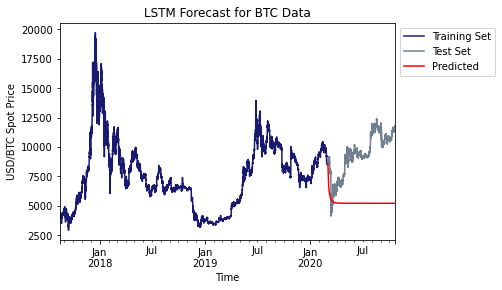

In [68]:
# LSTM for BTC - 1

# AdaMax with low lr
opt = tf.keras.optimizers.Adamax(learning_rate=0.0001, clipnorm = 1.0)

seed = 3
print('\nSeed:', seed)
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_LSTM_BTC, my_history = model_NN('BTC', 1, 'LSTM', n_cells = 50, n_layers = 3, n_epochs = 20, opt = opt)

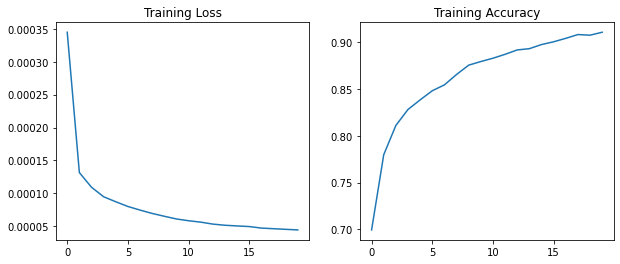

In [69]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot();
plt.title('Training Loss')

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot()
plt.title('Training Accuracy');
# plt.close();


Seed: 2
Train time:  329.6 minutes

RMSE =  26.97
MAE =  25.21
sMAPE =  163.82
CC =  20050.75 seconds
Total run time: 334.18 minutes


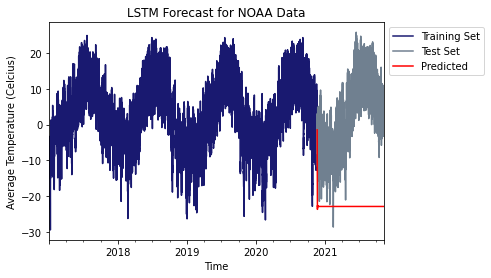

In [70]:
# LSTM for NOAA - 1

# AdaMax with low lr
opt = tf.keras.optimizers.Adamax(learning_rate=0.0001, clipnorm = 1.0)

seed = 2
print('\nSeed:', seed)
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_LSTM_NOAA, my_history = model_NN('NOAA', 1, 'LSTM', n_cells = 50, n_layers = 3, n_epochs = 20, opt = opt)

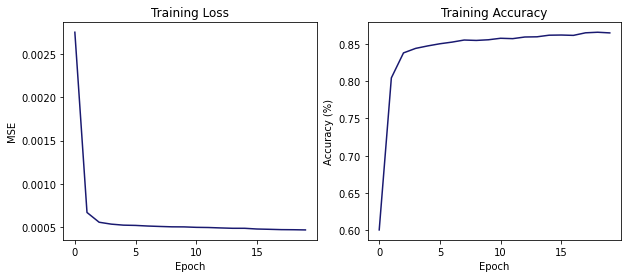

In [75]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot(c = 'midnightblue');
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE');

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot(c = 'midnightblue')
plt.title('Training Accuracy');
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)');

In [72]:
# Save results (preds + fits) to a file
df_preds_BTC.to_csv('Preds_BTC_RNN_LSTM.csv')
#df_fits_BTC.to_csv('Fits_BTC_Classical.csv')

df_preds_NOAA.to_csv('Preds_NOAA_RNN_LSTM.csv')
#df_fits_NOAA.to_csv('Fits_NOAA_Classical.csv')

# Save results_df to a file to recall later
results_df.to_csv('Results_RNN_LSTM.csv')

# End Section 15
<a class = 'anchor' id = 'section16'></a>

# Section 16: GRU Models
* [Back to Top](#TOC)

This section runs the GRU model using the neural network model function from the MLP section.

Due to computational constraints, it is only run on the primary dataset split.


Seed: 7
Train time:  263.93 minutes

RMSE =  2769.61
MAE =  2423.16
sMAPE =  27.98
CC =  16049.09 seconds
Total run time: 267.48 minutes


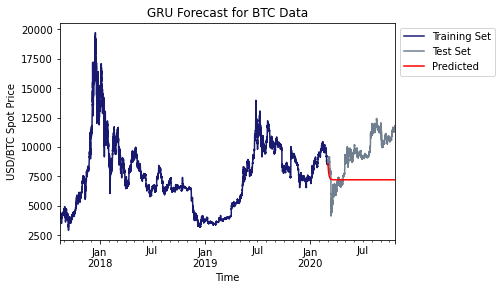

In [64]:
# GRU for BTC - 1

# AdaMax with low lr
opt = tf.keras.optimizers.Adamax(learning_rate=0.0001, clipnorm = 1.0)

seed = 7
print('\nSeed:', seed)
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_GRU_BTC, my_history = model_NN('BTC', 1, 'GRU', n_cells = 50, n_layers = 3, n_epochs = 20, opt = opt)

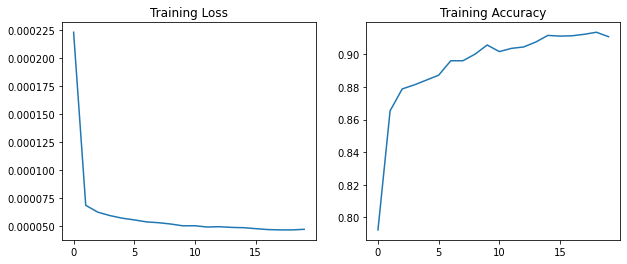

In [65]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot();
plt.title('Training Loss')

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot()
plt.title('Training Accuracy');
# plt.close();


Seed: 2
Train time:  405.83 minutes

RMSE =  28.63
MAE =  26.98
sMAPE =  165.7
CC =  24678.69 seconds
Total run time: 411.31 minutes


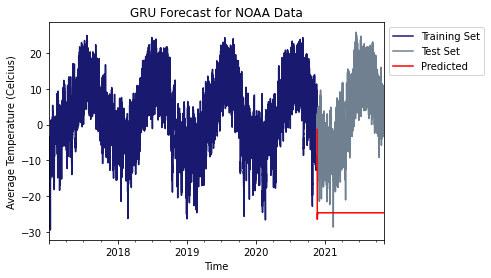

In [66]:
# GRU for NOAA - 1

# AdaMax with low lr
opt = tf.keras.optimizers.Adamax(learning_rate=0.0001, clipnorm = 1.0)

seed = 2
print('\nSeed:', seed)
np.random.seed(seed)
keras.utils.data_utils.random.seed(seed)
tf.random.set_seed(seed)
my_GRU_NOAA, my_history = model_NN('NOAA', 1, 'GRU', n_cells = 50, n_layers = 3, n_epochs = 20, opt = opt)

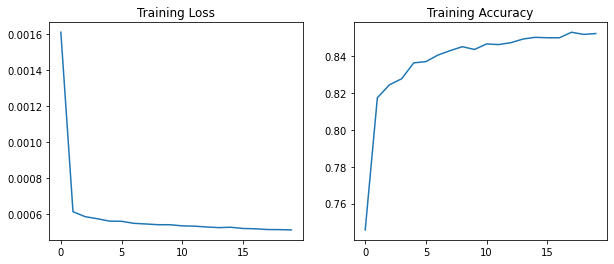

In [67]:
rcParams['figure.figsize'] = 10,4

plt.subplot(1, 2, 1)
my_history['Loss'].plot();
plt.title('Training Loss')

plt.subplot(1, 2, 2)
my_history['Accuracy'].plot()
plt.title('Training Accuracy');
# plt.close();

In [68]:
# Save results (preds + fits) to a file
df_preds_BTC.to_csv('Preds_BTC_GRU.csv')
#df_fits_BTC.to_csv('Fits_BTC_Classical.csv')

df_preds_NOAA.to_csv('Preds_NOAA_GRU.csv')
#df_fits_NOAA.to_csv('Fits_NOAA_Classical.csv')

# Save results_df to a file to recall later
results_df.to_csv('Results_GRU.csv')

# End Section 16
<a class = 'anchor' id = 'results'></a>

# Section 17: Formatting Results
* [Back to Top](#TOC)

This section involves importing the previously saved results saved to file from the various model sections. It reformats the CC (run time) column to strings and scales the sMAPE metric by 1/2 (making it a percentage from 0-100%).

This section ends with a cell that provides plots for a given model name.

In [66]:
# Read in results dataframes
results_classical = pd.read_csv('Results_Classical.csv', index_col='Unnamed: 0')
results_classical

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Benchmark,Naive 1,BTC,1,1892.77,1624.37,18.04,0.000972
1,Benchmark,Naive 1,BTC,2,2584.71,2380.67,25.90,0.000970
2,Benchmark,Naive 1,BTC,3,1673.10,1408.91,13.77,0.000960
3,Benchmark,Naive 1,NOAA,1,10.06,8.21,172.67,0.001002
4,Benchmark,Naive 1,NOAA,2,20.11,18.12,168.59,0.000997
5,Benchmark,Naive 1,NOAA,3,10.28,8.53,140.37,0.000981
6,Classical,ARIMA,BTC,1,1496.72,1186.84,13.20,5.130000
7,Classical,ARIMA,BTC,2,2266.42,2086.83,22.31,5.610000
8,Classical,ARIMA,BTC,3,1406.61,1159.11,11.14,5.540000
9,Classical,ARIMA,NOAA,1,9.81,8.02,182.74,5.160000


In [67]:
results_ML = pd.read_csv('Results_ML.csv', index_col='Unnamed: 0')
results_ML

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Machine Learning,SVR,BTC,1,1406.33,1053.30,11.87,11.04
1,Machine Learning,SVR,BTC,2,1571.42,1318.88,13.36,12.52
2,Machine Learning,SVR,BTC,3,1305.14,1070.51,10.24,13.39
3,Machine Learning,SVR,NOAA,1,10.06,8.39,124.09,27.64
4,Machine Learning,SVR,NOAA,2,10.07,8.33,177.92,35.94
5,Machine Learning,SVR,NOAA,3,12.88,11.19,188.55,37.67
6,Machine Learning,CART,BTC,1,1730.79,1345.97,14.89,0.02
7,Machine Learning,CART,BTC,2,3705.71,3566.40,41.83,0.02
8,Machine Learning,CART,BTC,3,1585.67,1343.97,13.08,0.03
9,Machine Learning,CART,NOAA,1,10.10,8.24,169.90,0.03


In [68]:
results_RNN_LSTM = pd.read_csv('Results_RNN_LSTM.csv', index_col='Unnamed: 0')
results_RNN_LSTM

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Deep Learning,RNN,BTC,1,1719.28,1329.74,14.72,6951.04
1,Deep Learning,RNN,NOAA,1,30.54,22.52,153.47,10758.15
2,Deep Learning,LSTM,BTC,1,4481.38,4120.16,54.10,13784.16
3,Deep Learning,LSTM,NOAA,1,26.97,25.21,163.82,20050.75


In [69]:
results_GRU = pd.read_csv('Results_GRU.csv', index_col='Unnamed: 0')
results_GRU

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Deep Learning,GRU,BTC,1,2769.61,2423.16,27.98,16049.09
1,Deep Learning,GRU,NOAA,1,28.63,26.98,165.70,24678.69


In [252]:
# Combine into one dataframe
RESULTSdf = pd.concat([results_classical, results_ML, results_RNN_LSTM, results_GRU], ignore_index=True)
RESULTSdf

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Benchmark,Naive 1,BTC,1,1892.77,1624.37,18.04,0.000972
1,Benchmark,Naive 1,BTC,2,2584.71,2380.67,25.90,0.000970
2,Benchmark,Naive 1,BTC,3,1673.10,1408.91,13.77,0.000960
3,Benchmark,Naive 1,NOAA,1,10.06,8.21,172.67,0.001002
4,Benchmark,Naive 1,NOAA,2,20.11,18.12,168.59,0.000997
...,...,...,...,...,...,...,...,...
79,Deep Learning,RNN,NOAA,1,30.54,22.52,153.47,10758.150000
80,Deep Learning,LSTM,BTC,1,4481.38,4120.16,54.10,13784.160000
81,Deep Learning,LSTM,NOAA,1,26.97,25.21,163.82,20050.750000
82,Deep Learning,GRU,BTC,1,2769.61,2423.16,27.98,16049.090000


In [255]:
# Save to file
RESULTSdf.to_csv('Results_ALL.csv')

In [256]:
# Check
RESULTSdf = pd.read_csv('Results_ALL.csv', index_col='Unnamed: 0')
RESULTSdf

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Benchmark,Naive 1,BTC,1,1892.77,1624.37,9.020,0.001 sec
1,Benchmark,Naive 1,BTC,2,2584.71,2380.67,12.950,0.001 sec
2,Benchmark,Naive 1,BTC,3,1673.10,1408.91,6.885,0.001 sec
3,Benchmark,Naive 1,NOAA,1,10.06,8.21,86.335,0.001 sec
4,Benchmark,Naive 1,NOAA,2,20.11,18.12,84.295,0.001 sec
...,...,...,...,...,...,...,...,...
79,Deep Learning,RNN,NOAA,1,30.54,22.52,76.735,10758.15 sec (3.0 hrs)
80,Deep Learning,LSTM,BTC,1,4481.38,4120.16,27.050,13784.16 sec (3.8 hrs)
81,Deep Learning,LSTM,NOAA,1,26.97,25.21,81.910,20050.75 sec (5.6 hrs)
82,Deep Learning,GRU,BTC,1,2769.61,2423.16,13.990,16049.09 sec (4.5 hrs)


In [253]:
# Divide sMAPE values by 2
# RESULTSdf['sMAPE'] = RESULTSdf['sMAPE']/2

In [254]:
# Format CC column
RESULTSdf['CC'] = RESULTSdf['CC'].map(format_CC)
RESULTSdf

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Benchmark,Naive 1,BTC,1,1892.77,1624.37,9.020,0.001 sec
1,Benchmark,Naive 1,BTC,2,2584.71,2380.67,12.950,0.001 sec
2,Benchmark,Naive 1,BTC,3,1673.10,1408.91,6.885,0.001 sec
3,Benchmark,Naive 1,NOAA,1,10.06,8.21,86.335,0.001 sec
4,Benchmark,Naive 1,NOAA,2,20.11,18.12,84.295,0.001 sec
...,...,...,...,...,...,...,...,...
79,Deep Learning,RNN,NOAA,1,30.54,22.52,76.735,10758.15 sec (3.0 hrs)
80,Deep Learning,LSTM,BTC,1,4481.38,4120.16,27.050,13784.16 sec (3.8 hrs)
81,Deep Learning,LSTM,NOAA,1,26.97,25.21,81.910,20050.75 sec (5.6 hrs)
82,Deep Learning,GRU,BTC,1,2769.61,2423.16,13.990,16049.09 sec (4.5 hrs)


In [257]:
# Results dataframes by train/test split
RESULTSdf_1 = RESULTSdf[RESULTSdf['Train/Test'] == 1].reset_index().drop('index', 1)
RESULTSdf_1

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Benchmark,Naive 1,BTC,1,1892.77,1624.37,9.020,0.001 sec
1,Benchmark,Naive 1,NOAA,1,10.06,8.21,86.335,0.001 sec
2,Classical,ARIMA,BTC,1,1496.72,1186.84,6.600,5.13 sec
3,Classical,ARIMA,NOAA,1,9.81,8.02,91.370,5.16 sec
4,Classical,SARIMA,BTC,1,4363.39,3675.87,23.555,262.44 sec (4.4 min)
5,Classical,SARIMA,NOAA,1,1323.37,1136.01,97.725,94.63 sec (1.6 min)
6,Classical,ETS - AAN,BTC,1,2980.57,2599.96,15.150,0.88 sec
7,Classical,ETS - AAN,NOAA,1,11.28,9.24,80.550,1.57 sec
8,Classical,ETS - AMN,BTC,1,1492.98,1182.95,6.580,1.17 sec
9,Classical,ETS - AMN,NOAA,1,32480.21,15813.01,98.850,1.1 sec


In [258]:
RESULTSdf_2 = RESULTSdf[RESULTSdf['Train/Test'] == 2].reset_index().drop('index', 1)
RESULTSdf_2

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Benchmark,Naive 1,BTC,2,2584.71,2380.67,12.950,0.001 sec
1,Benchmark,Naive 1,NOAA,2,20.11,18.12,84.295,0.001 sec
2,Classical,ARIMA,BTC,2,2266.42,2086.83,11.155,5.61 sec
3,Classical,ARIMA,NOAA,2,20.98,18.98,84.585,5.21 sec
4,Classical,SARIMA,BTC,2,3209.62,2941.84,16.605,249.8 sec (4.2 min)
5,Classical,SARIMA,NOAA,2,39.73,29.49,63.270,101.55 sec (1.7 min)
6,Classical,ETS - AAN,BTC,2,1544.82,1379.75,7.115,0.95 sec
7,Classical,ETS - AAN,NOAA,2,24.87,22.67,85.550,1.8 sec
8,Classical,ETS - AMN,BTC,2,2177.30,2002.68,10.655,1.12 sec
9,Classical,ETS - AMN,NOAA,2,6819.78,3541.11,92.630,1.06 sec


In [259]:
RESULTSdf_3 = RESULTSdf[RESULTSdf['Train/Test'] == 3].reset_index().drop('index', 1)
RESULTSdf_3

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
0,Benchmark,Naive 1,BTC,3,1673.10,1408.91,6.885,0.001 sec
1,Benchmark,Naive 1,NOAA,3,10.28,8.53,70.185,0.001 sec
2,Classical,ARIMA,BTC,3,1406.61,1159.11,5.570,5.54 sec
3,Classical,ARIMA,NOAA,3,10.15,8.41,67.780,5.77 sec
4,Classical,SARIMA,BTC,3,1762.73,1490.31,7.325,273.25 sec (4.6 min)
5,Classical,SARIMA,NOAA,3,78.08,64.01,68.305,108.65 sec (1.8 min)
6,Classical,ETS - AAN,BTC,3,1270.24,1024.17,4.885,0.95 sec
7,Classical,ETS - AAN,NOAA,3,10.15,8.41,67.925,1.89 sec
8,Classical,ETS - AMN,BTC,3,1207.65,957.34,4.550,1.23 sec
9,Classical,ETS - AMN,NOAA,3,1622.70,983.98,83.990,1.28 sec


In [267]:
cond1 = (RESULTSdf_1['Model Class'] == 'Benchmark')
cond2 = (RESULTSdf_1['Model Class'] == 'Classical')
cond3 = (RESULTSdf_1['Model Class'] == 'Machine Learning')
cond4 = (RESULTSdf_1['Model Class'] == 'Deep Learning')

condB = (RESULTSdf_1['Dataset'] == 'BTC')
condN = (RESULTSdf_1['Dataset'] == 'NOAA')

RESULTSdf_1.loc[condN & cond4]

,Model Class,Model Name,Dataset,Train/Test,RMSE,MAE,sMAPE,CC
27,Deep Learning,RNN,NOAA,1,30.54,22.52,76.735,10758.15 sec (3.0 hrs)
29,Deep Learning,LSTM,NOAA,1,26.97,25.21,81.910,20050.75 sec (5.6 hrs)
31,Deep Learning,GRU,NOAA,1,28.63,26.98,82.850,24678.69 sec (6.9 hrs)


In [250]:
# Create function that changes format of CC columnd
def format_CC(val):
    '''
    Function that reformats a given time value in seconds to various string outputs
    depending on its value. Run times less than one minute remain in seconds, run times
    less than hour are given an additional string in minutes, and run times greater than
    an hour are given an additional string in hours. Value are also rounded.
    
    If the passed in value is already a string it is ignored.
    
    INPUTS:
    *val: float representing run time in seconds.
    
    OUTPUTS:
    *val: string representing the rounded run time in seconds, minutes, or hours
    '''
    # Check if already mapped
    if type(val) == type(''):
        return val
    
    # Time in seconds - benchmark format
    if val < 0.002:
        val = str(np.round(val, 3)) + ' sec'
        
    # Time in seconds
    elif val > 0.002 and val < 60:
        val = str(np.round(val, 2)) + ' sec'
    
    # Time in minutes
    elif val >= 60 and val < 60*60:
        val = str(np.round(val, 2)) + ' sec (' + str(np.round(val/60, 1)) + ' min)'
        
    # Time in hours
    else:
        val = str(np.round(val, 2)) + ' sec (' + str(np.round(val/60/60, 1)) + ' hrs)'
        
    return val

In [284]:
Preds_NOAA_classical = pd.read_csv('Preds_NOAA_Classical.csv', index_col='Unnamed: 0')
Preds_NOAA_ML = pd.read_csv('Preds_NOAA_ML.csv', index_col='Unnamed: 0')
Preds_NOAA_RNN = pd.read_csv('Preds_NOAA_RNN_LSTM.csv', index_col='Unnamed: 0')

Preds_BTC_classical = pd.read_csv('Preds_BTC_Classical.csv', index_col='Unnamed: 0')
Preds_BTC_ML = pd.read_csv('Preds_BTC_ML.csv', index_col='Unnamed: 0')
Preds_BTC_RNN = pd.read_csv('Preds_BTC_RNN_LSTM.csv', index_col='Unnamed: 0')

# Making main df for each dataset
Preds_NOAA = pd.concat([Preds_NOAA_classical, Preds_NOAA_ML, Preds_NOAA_RNN])
Preds_BTC = pd.concat([Preds_BTC_classical, Preds_BTC_ML, Preds_BTC_RNN])

# Convert index
Preds_NOAA.index = pd.to_datetime(Preds_NOAA.index)
Preds_BTC.index = pd.to_datetime(Preds_BTC.index)

In [286]:
Preds_BTC

,BTC_Benchmark_1,BTC_Benchmark_2,BTC_Benchmark_3,BTC_ARIMA_1,BTC_ARIMA_2,BTC_ARIMA_3,BTC_SARIMA_1,BTC_SARIMA_2,BTC_SARIMA_3,BTC_ETS - AAN_1,...,BTC_CART_2,BTC_CART_3,BTC_KNN_1,BTC_KNN_2,BTC_KNN_3,BTC_MLP_1,BTC_MLP_2,BTC_MLP_3,BTC_RNN_1,BTC_LSTM_1
2020-03-02 04:00:00,8601.99,NaN,NaN,8600.205089,NaN,NaN,8599.880529,NaN,NaN,8602.97309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02 05:00:00,8601.99,NaN,NaN,8599.260735,NaN,NaN,8618.273184,NaN,NaN,8602.57208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02 06:00:00,8601.99,NaN,NaN,8598.798879,NaN,NaN,8567.720570,NaN,NaN,8602.17107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02 07:00:00,8601.99,NaN,NaN,8598.613989,NaN,NaN,8588.015443,NaN,NaN,8601.77006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-02 08:00:00,8601.99,NaN,NaN,8598.588083,NaN,NaN,8586.849052,NaN,NaN,8601.36905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9453.498,5216.8647
2020-10-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9453.497,5216.8643
2020-10-20 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9453.500,5216.8647
2020-10-20 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9453.500,5216.8647


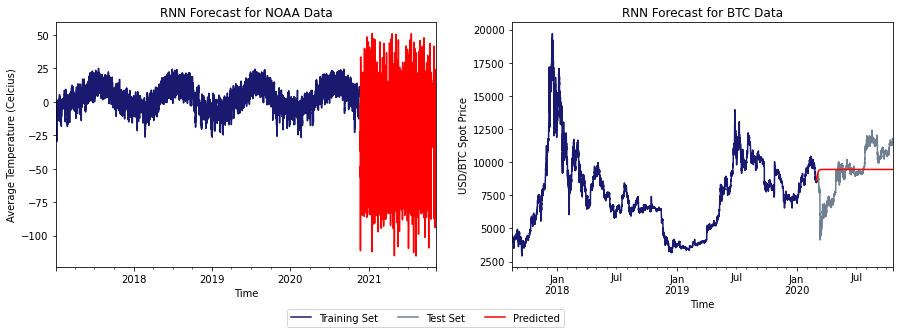

In [320]:
# Generating plots of best-performing models

dataset1 = 'NOAA'
dataset2 = 'BTC'
split_num = 1

model_name = 'RNN'

 # Get relevant training and test sets
training_set1, test_set1 = get_data(dataset1, split_num)
training_set2, test_set2 = get_data(dataset2, split_num)

# Get predictions
predictions1 = Preds_NOAA[dataset1+'_'+model_name+'_'+str(split_num)]
predictions2 = Preds_BTC[dataset2+'_'+model_name+'_'+str(split_num)]

# Plots
rcParams['figure.figsize'] = 15, 4.5

plt.subplot(1, 2, 1)
training_set1.plot(label = 'Training Set', c = 'midnightblue')
test_set1.plot(label = 'Test Set', c = 'slategray');
predictions1.plot(label = 'Predicted', c = 'r');
if dataset1 == 'BTC':
    plt.ylabel('USD/BTC Spot Price')
elif dataset1 == 'NOAA':
    plt.ylabel('Average Temperature (Celcius)')
plt.xlabel('Time')
plt.title(f'{model_name} Forecast for {dataset1} Data');

    

plt.subplot(1, 2, 2)
training_set2.plot(label = 'Training Set', c = 'midnightblue')
test_set2.plot(label = 'Test Set', c = 'slategray');
predictions2.plot(label = 'Predicted', c = 'r');
if dataset2 == 'BTC':
    plt.ylabel('USD/BTC Spot Price')
elif dataset2 == 'NOAA':
    plt.ylabel('Average Temperature (Celcius)')
plt.xlabel('Time')
plt.title(f'{model_name} Forecast for {dataset2} Data');
legend = True
if legend: plt.legend(bbox_to_anchor = (0.15,-0.15), loc = 'bottom center', ncol=3);